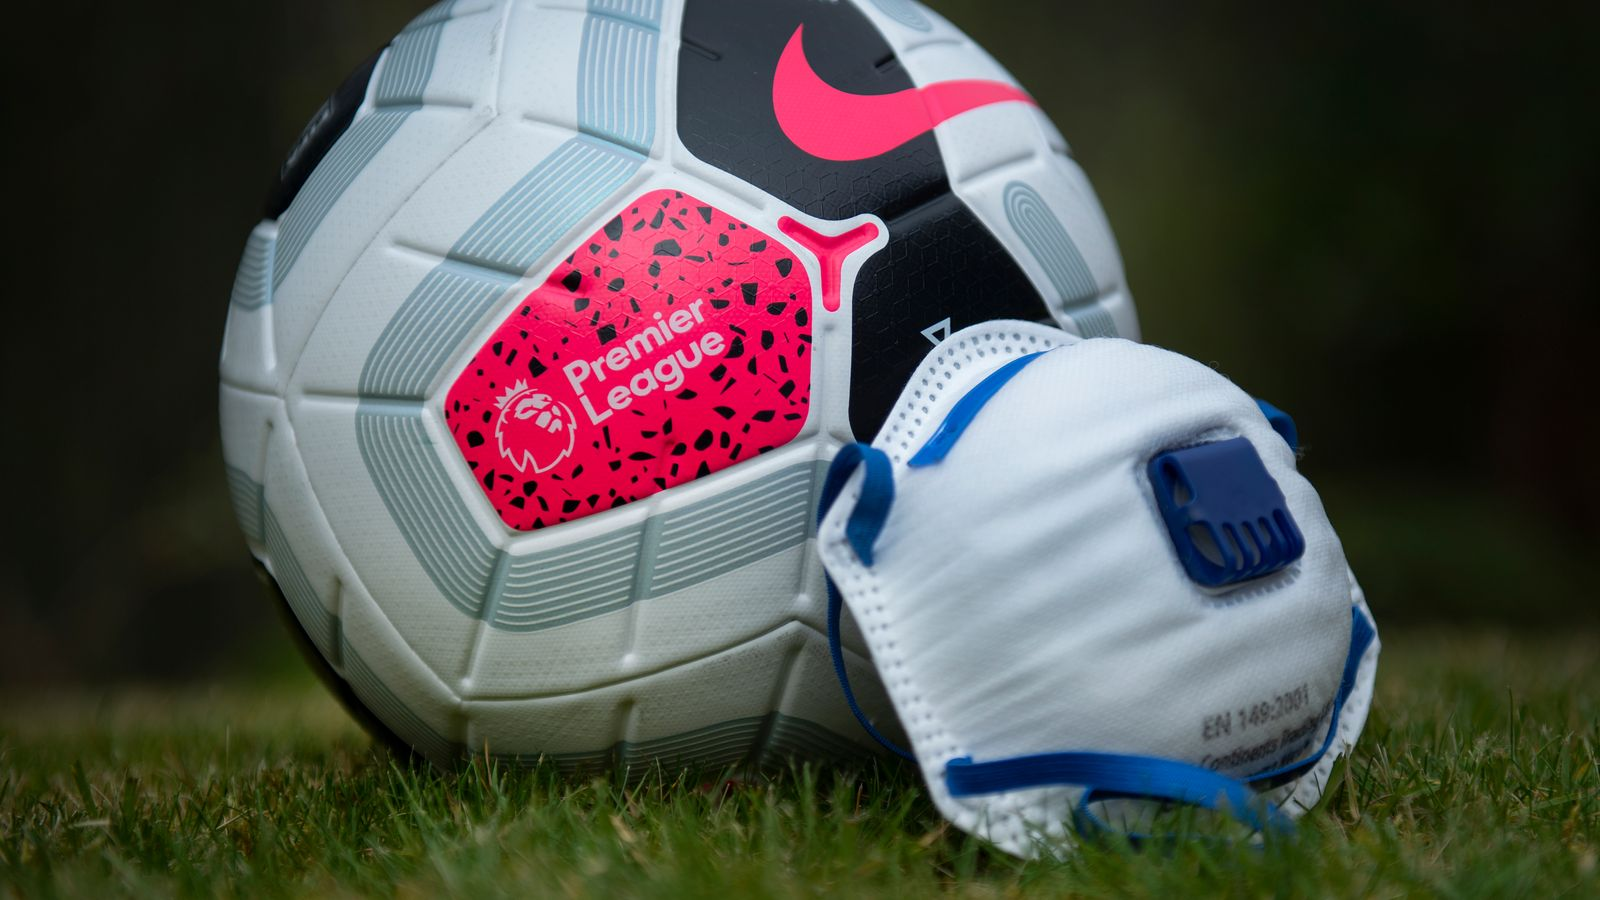

# Effects of COVID on Major European Leagues

### Has the level of play worsen?

I could not stop myself from noticing a moderate decline in the quality of play from the teams of the leagues I follow (EPL, Spanish league). Major teams became unpredictable due to not having the "12th" player support, aka the fans/crowd. 

After discussing this issue with collegues, i decided to do an exploratory analysis and compare different parameters Before/after Covid games to spot the definitive causal link. 

This Notebook will contain most of the stats from all the matches played during Covid period from the 4 Major european leagues.
For comparison, it will gather data from up to 5 years prior to Covid, for consistency (league/teams can have 1 bad year).

Data exctacted from: https://www.football-data.co.uk/data.php


### LOADING ALL THE NECCESARY MODULES

In [28]:
# This python 3 env. comes with many helpful analytics libraries installed such as: 

import pandas as pd         # Most of the analysis and data transformation will be done using pandas library.                     
import numpy as np
import os                    
from datetime import datetime
import warnings
import matplotlib.pyplot as plt        # Visualization tool
import seaborn as sns                  # Visualization tool



In [29]:
# The first league to be loaded and analysed will be the EPL. We exctract all the data from the pre-downloaded files 

# Pre-Covid
E0_all_data_15 = pd.read_csv('2015db/E0.csv')
E0_all_data_16 = pd.read_csv('2016db/E0.csv')
E0_all_data_17 = pd.read_csv('2017db/E0.csv')
E0_all_data_18 = pd.read_csv('2018db/E0.csv')

# During Covid

E0_all_data_19 = pd.read_csv('2019db/E0.csv')
E0_all_data_20 = pd.read_csv('2020db/E0.csv')


In [30]:
#data_19.columns
E0_all_data_19.head(5)

#data_19.info()
#data_20.info()

# Uncomment to explore the data, all column's name, types, range etc. 


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [31]:
#COLUMNS WE WILL WORK WITH: 


#Div = League Division
#Date = Match Date (dd/mm/yy)
#HomeTeam = Home Team
#AwayTeam = Away Team
#FTHG = Full Time Home Team Goals
#FTAG = Full Time Away Team Goals
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
#HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

# Below are posible additional stadistics we could use later down the line. 

#HS = Home Team Shots
#AS = Away Team Shots
#HST = Home Team Shots on Target
#AST = Away Team Shots on Target
#HTHG = Half Time Home Team Goals
#HTAG = Half Time Away Team Goals
#HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)


### Modifying Dataframe: Creating separated season DFs with specific columns

In [32]:
# We clearly have way too many columns. We need to either drop some of them or create a new DF with a selected few. 
# Since there are many and for our analysis we only need a handful, we'll approach the second method. 
# We could use an iloc method to do it, but it would deem unconsistent if original data is altered.


E0_data_19 = E0_all_data_19[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
E0_data_20 = E0_all_data_20[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]

E0_data_19

#The date is updated. Attendance came into a halt in march due to COVID. All games were postponed, so it will be very easy to get.
#If we want to analyze this data correctly we must reate 2 new dataframes: precovid and postcovid. 

E0_data_15 = E0_all_data_15[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
E0_data_16 = E0_all_data_16[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
E0_data_17 = E0_all_data_17[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
E0_data_18 = E0_all_data_18[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]


### Adding new cols : Match results

In [33]:
# FTR ( full time result), being a string, is not a good metric to use if we want to apply aggregate stadistics to our data. 
# We will create a new column for each posible result ( being home wins/ loses and vicerversa.) 

pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=SyntaxWarning)        #Used to ignore some warnings which does not apply in our ex.
warnings.filterwarnings(
    action='ignore',
    category=SyntaxWarning,
    module=r'jmespath\.visitor'
)

# df['new col name'] = df['col name'].apply(lambda x: 'value if cond. is met' if x cond. else 'value if cond. is not met')

E0_data_19['Home_Win'] = E0_data_19['FTR'].apply(lambda x: 1 if x is 'H' else 0)
E0_data_19['Home_Draw'] = E0_data_19['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_19['Home_Loss'] = E0_data_19['FTR'].apply(lambda x: 1 if x is 'A' else 0)


E0_data_19['Away_Win'] = E0_data_19['FTR'].apply(lambda x: 1 if x is 'A' else 0)
E0_data_19['Away_Draw'] = E0_data_19['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_19['Away_Loss'] = E0_data_19['FTR'].apply(lambda x: 1 if x is 'H' else 0)

E0_data_19 = E0_data_19.drop(columns=['FTR'], axis = 1)

E0_data_19


# Data_19 is all set. We can now count each on of the results together with groupby team to get somewhat of a standings table.




E0_data_15['Home_Win'] = E0_data_15['FTR'].apply(lambda x: 1 if x is 'H' else 0)
E0_data_15['Home_Draw'] = E0_data_15['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_15['Home_Loss'] = E0_data_15['FTR'].apply(lambda x: 1 if x is 'A' else 0)


E0_data_15['Away_Win'] = E0_data_15['FTR'].apply(lambda x: 1 if x is 'A' else 0)
E0_data_15['Away_Draw'] = E0_data_15['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_15['Away_Loss'] = E0_data_15['FTR'].apply(lambda x: 1 if x is 'H' else 0)

E0_data_15 = E0_data_15.drop(columns=['FTR'], axis = 1)


E0_data_16['Home_Win'] = E0_data_16['FTR'].apply(lambda x: 1 if x is 'H' else 0)
E0_data_16['Home_Draw'] = E0_data_16['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_16['Home_Loss'] = E0_data_16['FTR'].apply(lambda x: 1 if x is 'A' else 0)


E0_data_16['Away_Win'] = E0_data_16['FTR'].apply(lambda x: 1 if x is 'A' else 0)
E0_data_16['Away_Draw'] = E0_data_16['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_16['Away_Loss'] = E0_data_16['FTR'].apply(lambda x: 1 if x is 'H' else 0)

E0_data_16 = E0_data_16.drop(columns=['FTR'], axis = 1)


E0_data_17['Home_Win'] = E0_data_17['FTR'].apply(lambda x: 1 if x is 'H' else 0)
E0_data_17['Home_Draw'] = E0_data_17['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_17['Home_Loss'] = E0_data_17['FTR'].apply(lambda x: 1 if x is 'A' else 0)


E0_data_17['Away_Win'] = E0_data_17['FTR'].apply(lambda x: 1 if x is 'A' else 0)
E0_data_17['Away_Draw'] = E0_data_17['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_17['Away_Loss'] = E0_data_17['FTR'].apply(lambda x: 1 if x is 'H' else 0)

E0_data_17 = E0_data_17.drop(columns=['FTR'], axis = 1)


E0_data_18['Home_Win'] = E0_data_18['FTR'].apply(lambda x: 1 if x is 'H' else 0)
E0_data_18['Home_Draw'] = E0_data_18['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_18['Home_Loss'] = E0_data_18['FTR'].apply(lambda x: 1 if x is 'A' else 0)


E0_data_18['Away_Win'] = E0_data_18['FTR'].apply(lambda x: 1 if x is 'A' else 0)
E0_data_18['Away_Draw'] = E0_data_18['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_18['Away_Loss'] = E0_data_18['FTR'].apply(lambda x: 1 if x is 'H' else 0)

E0_data_18 = E0_data_18.drop(columns=['FTR'], axis = 1)




In [34]:
## We do exacly the same with the data_20 data:

E0_data_20['Home_Win'] = E0_data_20['FTR'].apply(lambda x: 1 if x is 'H' else 0)
E0_data_20['Home_Draw'] = E0_data_20['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_20['Home_Loss'] = E0_data_20['FTR'].apply(lambda x: 1 if x is 'A' else 0)


E0_data_20['Away_Win'] = E0_data_20['FTR'].apply(lambda x: 1 if x is 'A' else 0)
E0_data_20['Away_Draw'] = E0_data_20['FTR'].apply(lambda x: 1 if x is 'D' else 0)
E0_data_20['Away_Loss'] = E0_data_20['FTR'].apply(lambda x: 1 if x is 'H' else 0)

E0_data_20 = E0_data_20.drop(columns=['FTR'], axis = 1)

E0_data_20


# Data_20 is also all set. Onto the next problem

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Home_Win,Home_Draw,Home_Loss,Away_Win,Away_Draw,Away_Loss
0,E0,12/09/2020,Fulham,Arsenal,0,3,0,0,1,1,0,0
1,E0,12/09/2020,Crystal Palace,Southampton,1,0,1,0,0,0,0,1
2,E0,12/09/2020,Liverpool,Leeds,4,3,1,0,0,0,0,1
3,E0,12/09/2020,West Ham,Newcastle,0,2,0,0,1,1,0,0
4,E0,13/09/2020,West Brom,Leicester,0,3,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,23/05/2021,Liverpool,Crystal Palace,2,0,1,0,0,0,0,1
376,E0,23/05/2021,Man City,Everton,5,0,1,0,0,0,0,1
377,E0,23/05/2021,Sheffield United,Burnley,1,0,1,0,0,0,0,1
378,E0,23/05/2021,West Ham,Southampton,3,0,1,0,0,0,0,1


In [35]:
E0_data_15['Date'] = pd.to_datetime(E0_data_15['Date'], format= '%d/%m/%Y')
E0_data_16['Date'] = pd.to_datetime(E0_data_16['Date'], format= '%d/%m/%y')   # year format 16,  not 2016*
E0_data_17['Date'] = pd.to_datetime(E0_data_17['Date'], format= '%d/%m/%Y')
E0_data_18['Date'] = pd.to_datetime(E0_data_18['Date'], format= '%d/%m/%Y')

E0_data_19['Date'] = pd.to_datetime(E0_data_19['Date'], format= '%d/%m/%Y')
E0_data_20['Date'] = pd.to_datetime(E0_data_20['Date'], format= '%d/%m/%Y')

E0_pre_data_19 = E0_data_19.loc[(E0_data_19['Date'] > '08/08/2019') & (E0_data_19['Date'] < '14/03/2020')]
E0_post_covid_19 = E0_data_19.iloc[288:]


E0_post_covid = pd.concat([E0_post_covid_19, E0_data_20])

E0_pre_data_19

#  DATA FROM DATES EXTRACTED FROM https://en.wikipedia.org/wiki/2019%E2%80%9320_Premier_League 


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Home_Win,Home_Draw,Home_Loss,Away_Win,Away_Draw,Away_Loss
0,E0,2019-08-09,Liverpool,Norwich,4,1,1,0,0,0,0,1
1,E0,2019-08-10,West Ham,Man City,0,5,0,0,1,1,0,0
2,E0,2019-08-10,Bournemouth,Sheffield United,1,1,0,1,0,0,1,0
3,E0,2019-08-10,Burnley,Southampton,3,0,1,0,0,0,0,1
4,E0,2019-08-10,Crystal Palace,Everton,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
283,E0,2020-03-07,Wolves,Brighton,0,0,0,1,0,0,1,0
284,E0,2020-03-07,Burnley,Tottenham,1,1,0,1,0,0,1,0
285,E0,2020-03-08,Chelsea,Everton,4,0,1,0,0,0,0,1
286,E0,2020-03-08,Man United,Man City,2,0,1,0,0,0,0,1


### GROUP BY 

In [36]:
# One of the hipothesis of this project was, that without the "support" of the fans with the pressure they add into football
# Away games goals and wins will look somewhat similar. A lot more than previous years that is.

#First let's create 2 sets of tables, one for home and another one for away data. In each one, we want a specific set of
# aggregate parameters, so we will use the groupby().agg and a list in form of dictionary for the aggs.

E0_home_pre = E0_pre_data_19.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})

E0_away_pre = E0_pre_data_19.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})

E0_home_post = E0_post_covid.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})

E0_away_post = E0_post_covid.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})

E0_grouped_predata_19 = pd.concat([E0_home_pre, E0_away_pre], axis = 1)

E0_grouped_postdata = pd.concat([E0_home_post, E0_away_post], axis = 1)


E0_total_pre_games = (E0_grouped_predata_19['HomeTeam'].mean() + E0_grouped_predata_19['AwayTeam'].mean()).round(0)
E0_total_post_games = 76 - E0_total_pre_games
#total_pre_games
E0_grouped_predata_19.head(5)

,HomeTeam,FTHG,FTAG,Home_Win,Home_Draw,Home_Loss,AwayTeam,FTHG,FTAG,Away_Win,Away_Draw,Away_Loss
Arsenal,15,1.73,1.33,7,5,3,13,1.23,1.08,2,8,3
Aston Villa,13,1.38,1.85,5,2,6,15,2.13,1.07,2,2,11
Bournemouth,14,1.21,1.50,4,5,5,15,1.73,0.80,3,1,11
Brighton,14,1.21,1.07,4,6,4,15,1.67,1.00,2,5,8
Burnley,15,1.33,1.27,7,2,6,14,1.50,1.00,4,4,6


In [37]:
E0_Home_15 = E0_data_15.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
E0_Away_15 = E0_data_15.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
E0_grouped_predata_15 = pd.concat([E0_Home_15, E0_Away_15], axis = 1)


E0_Home_16 = E0_data_16.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
E0_Away_16 = E0_data_16.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
E0_grouped_predata_16 = pd.concat([E0_Home_16, E0_Away_16], axis = 1)


E0_Home_17 = E0_data_17.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
E0_Away_17 = E0_data_17.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
E0_grouped_predata_17 = pd.concat([E0_Home_17, E0_Away_17], axis = 1)


E0_Home_18 = E0_data_18.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
E0_Away_18 = E0_data_18.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
E0_grouped_predata_18 = pd.concat([E0_Home_18, E0_Away_18], axis = 1)



### Additional Transformation to the data: Making it easier to read and avoiding duplicate column label names: 

In [38]:
pd.options.display.float_format = '{:,.3f}'.format

E0_grouped_predata_19['Home_Winrate'] = E0_grouped_predata_19['Home_Win'] / E0_grouped_predata_19['HomeTeam'] * 100
E0_grouped_predata_19['Away_Winrate'] = E0_grouped_predata_19['Away_Win'] / E0_grouped_predata_19['AwayTeam'] * 100


E0_grouped_predata_19.columns = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']



E0_grouped_postdata['Home_Winrate'] = E0_grouped_postdata['Home_Win'] / E0_grouped_postdata['HomeTeam'] * 100
E0_grouped_postdata['Away_Winrate'] = E0_grouped_postdata['Away_Win'] / E0_grouped_postdata['AwayTeam'] * 100

E0_grouped_postdata.columns = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']

E0_grouped_predata_19.head(8)


,Home_Games,AVG_HGF,AVG_HGA,Home_Win,Home_Draw,Home_Loss,Away_Games,AVG_AGF,AVG_AGA,Away_Win,Away_Draw,Away_Loss,Home_Winrate,Away_Winrate
Arsenal,15,1.733,1.333,7,5,3,13,1.231,1.077,2,8,3,46.667,15.385
Aston Villa,13,1.385,1.846,5,2,6,15,2.133,1.067,2,2,11,38.462,13.333
Bournemouth,14,1.214,1.500,4,5,5,15,1.733,0.800,3,1,11,28.571,20.000
Brighton,14,1.214,1.071,4,6,4,15,1.667,1.000,2,5,8,28.571,13.333
Burnley,15,1.333,1.267,7,2,6,14,1.500,1.000,4,4,6,46.667,28.571
Chelsea,15,1.467,1.000,7,3,5,14,1.714,2.071,7,3,4,46.667,50.000
Crystal Palace,15,0.800,0.867,6,4,5,14,1.357,1.000,4,5,5,40.000,28.571
Everton,14,1.357,1.071,7,4,3,15,2.067,1.200,3,3,9,50.000,20.000


In [39]:
pd.options.display.float_format = '{:,.3f}'.format

E0_grouped_predata_15['Home_Winrate'] = E0_grouped_predata_15['Home_Win'] / E0_grouped_predata_15['HomeTeam'] * 100
E0_grouped_predata_15['Away_Winrate'] = E0_grouped_predata_15['Away_Win'] / E0_grouped_predata_15['AwayTeam'] * 100

E0_grouped_predata_16['Home_Winrate'] = E0_grouped_predata_16['Home_Win'] / E0_grouped_predata_16['HomeTeam'] * 100
E0_grouped_predata_16['Away_Winrate'] = E0_grouped_predata_16['Away_Win'] / E0_grouped_predata_16['AwayTeam'] * 100

E0_grouped_predata_17['Home_Winrate'] = E0_grouped_predata_17['Home_Win'] / E0_grouped_predata_17['HomeTeam'] * 100
E0_grouped_predata_17['Away_Winrate'] = E0_grouped_predata_17['Away_Win'] / E0_grouped_predata_17['AwayTeam'] * 100

E0_grouped_predata_18['Home_Winrate'] = E0_grouped_predata_18['Home_Win'] / E0_grouped_predata_18['HomeTeam'] * 100
E0_grouped_predata_18['Away_Winrate'] = E0_grouped_predata_18['Away_Win'] / E0_grouped_predata_18['AwayTeam'] * 100


cols = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']

E0_grouped_predata_15.columns = cols
E0_grouped_predata_16.columns = cols
E0_grouped_predata_17.columns = cols
E0_grouped_predata_18.columns = cols

E0_grouped_predata_15.head()


,Home_Games,AVG_HGF,AVG_HGA,Home_Win,Home_Draw,Home_Loss,Away_Games,AVG_AGF,AVG_AGA,Away_Win,Away_Draw,Away_Loss,Home_Winrate,Away_Winrate
Arsenal,19,1.632,0.579,12,4,3,19,1.316,1.789,8,7,4,63.158,42.105
Aston Villa,19,0.737,1.842,2,5,12,19,2.158,0.684,1,3,15,10.526,5.263
Bournemouth,19,1.211,1.789,5,5,9,19,1.737,1.158,6,4,9,26.316,31.579
Chelsea,19,1.684,1.579,5,9,5,19,1.211,1.421,7,5,7,26.316,36.842
Crystal Palace,19,1.000,1.211,6,3,10,19,1.474,1.053,5,6,8,31.579,26.316


In [40]:
def color_negative_red(value):
    """
    Colors elements from a dataframe, red for negative
    values, green for positive. (Nan Values default)
    """
    if value < 0:
        color = 'red'
    elif value > 0:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color



In [41]:
# STUFF TO COMPARE / ANALYSE DIFF OFF / Hipothesis: 

# 1) DIfference Between pre covid (AVG_HGF - AVG_AGA) should be higher than  (AVG_HGF - AVG_AGF) post covid

# 2) Post covid AVG_HGA and AVG_AGA should be higher than same values pre covid. 

# 3) Difference between pre covid Home_winrate - Away_winrate (ovr AVG) should be higher than same values post_covid.


pd.options.display.float_format = '{:,.2f}'.format


E0_diff_19 = pd.concat([E0_grouped_predata_19, E0_grouped_postdata ], axis = 1)

# 1

E0_diff_19['Prediff_HGF_AGA']  = E0_grouped_predata_19['AVG_HGF'] - E0_grouped_predata_19['AVG_AGA'] # Positive (green)
E0_diff_19['Postdiff_HGF_AGA']  = E0_grouped_postdata['AVG_HGF'] - E0_grouped_postdata['AVG_AGA']  # Positive (green)

# 2

E0_diff_19['Diff_AGA_AGA'] = E0_grouped_postdata['AVG_AGA'] - E0_grouped_predata_19['AVG_AGA'] # Positive.+ away goals scored away
E0_diff_19['Diff_HGA_HGA'] = E0_grouped_postdata['AVG_HGA'] - E0_grouped_predata_19['AVG_HGA'] # Positive + away goals conceded home


# 3 

E0_diff_19['Prediff_HW_AW']  = (E0_grouped_predata_19['Home_Winrate'] - E0_grouped_predata_19['Away_Winrate']) / 100 # Positive (green)
E0_diff_19['Postdiff_HW_AW'] = (E0_grouped_postdata['Home_Winrate'] - E0_grouped_postdata['Away_Winrate']) / 100 # Tends to 0. Lower than pre.

# 4- Total goals scored makes little sense in 2019, since it has fewer games played. We calculate it so we can have the avg goals.

E0_diff_19['Pretotal_HG'] = E0_grouped_predata_19['AVG_HGF'] * E0_grouped_predata_19['Home_Games']
E0_diff_19['Pretotal_AG'] = E0_grouped_predata_19['AVG_AGA'] * E0_grouped_predata_19['Away_Games']
E0_diff_19['Postotal_HG'] = E0_grouped_postdata['AVG_HGF'] * E0_grouped_postdata['Home_Games']
E0_diff_19['Postotal_AG'] = E0_grouped_postdata['AVG_AGA'] * E0_grouped_postdata['Away_Games']


# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

E0_diff_19 = E0_diff_19.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()
#E0_diff_19 = E0_diff_19.loc[:, 'Prediff_HGF_AGA' : 'Postotal_AG'].dropna()

s = E0_diff_19.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


,Prediff_HGF_AGA,Postdiff_HGF_AGA,Diff_AGA_AGA,Diff_HGA_HGA,Prediff_HW_AW,Postdiff_HW_AW
Arsenal,0.66,-0.00,0.40,-0.25,31.3%,-0.2%
Aston Villa,0.32,0.06,0.19,-0.53,25.1%,-3.1%
Bournemouth,0.41,-0.50,0.70,0.30,8.6%,-5.0%
Brighton,0.21,0.09,-0.04,0.35,15.2%,-9.6%
Burnley,0.33,-0.22,0.00,0.08,18.1%,-15.8%
Chelsea,-0.60,0.15,-0.53,-0.17,-3.3%,6.5%
Crystal Palace,-0.20,0.04,-0.04,0.83,11.4%,-3.1%
Everton,0.16,0.12,-0.11,0.35,30.0%,-27.4%
Leicester,0.00,0.11,-0.42,0.39,10.0%,2.0%
Liverpool,0.81,-0.13,0.06,0.24,14.3%,6.5%


In [42]:
#E0_diff_19['Prediff_HGF_AGA'].mean() 
#E0_diff_15['Postdiff_HGF_AGA'].mean() 

#E0_diff_19['Diff_AGA_AGA'].mean()
#E0_diff_19['Diff_HGA_HGA'].mean()

#E0_diff_19['Prediff_HW_AW'].mean()
#E0_diff_19['Postdiff_HW_AW'].mean()




In [43]:
pd.options.display.float_format = '{:,.2f}'.format

E0_diff_15 = pd.concat([E0_grouped_predata_15, E0_grouped_postdata ], axis = 1)

E0_diff_15['Prediff_HGF_AGA']  = E0_grouped_predata_15['AVG_HGF'] - E0_grouped_predata_15['AVG_AGA'] # Positive 
E0_diff_15['Postdiff_HGF_AGA']  = E0_grouped_postdata['AVG_HGF'] - E0_grouped_postdata['AVG_AGA']  # Positive 


E0_diff_15['Diff_AGA_AGA'] = E0_grouped_postdata['AVG_AGA'] - E0_grouped_predata_15['AVG_AGA']
E0_diff_15['Diff_HGA_HGA'] = E0_grouped_postdata['AVG_HGA'] - E0_grouped_predata_15['AVG_HGA']

E0_diff_15['Prediff_HW_AW']  = (E0_grouped_predata_15['Home_Winrate'] - E0_grouped_predata_15['Away_Winrate'] ) /100
E0_diff_15['Postdiff_HW_AW'] = (E0_grouped_postdata['Home_Winrate'] - E0_grouped_postdata['Away_Winrate']) / 100

E0_diff_15['Pretotal_HG'] = E0_grouped_predata_15['AVG_HGF'] * E0_grouped_predata_15['Home_Games']
E0_diff_15['Pretotal_AG'] = E0_grouped_predata_15['AVG_AGA'] * E0_grouped_predata_15['Away_Games']
E0_diff_15['Postotal_HG'] = E0_grouped_postdata['AVG_HGF'] * E0_grouped_postdata['Home_Games']
E0_diff_15['Postotal_AG'] = E0_grouped_postdata['AVG_AGA'] * E0_grouped_postdata['Away_Games']


E0_diff_15 = E0_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postotal_AG'].dropna()
#E0_diff_15 = E0_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = E0_diff_15.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s




,Prediff_HGF_AGA,Postdiff_HGF_AGA,Diff_AGA_AGA,Diff_HGA_HGA,Prediff_HW_AW,Postdiff_HW_AW,Pretotal_HG,Pretotal_AG,Postotal_HG,Postotal_AG
Arsenal,-0.16,-0.00,-0.31,0.51,21.1%,-0.2%,31,34,34,37
Aston Villa,0.05,0.06,0.58,-0.52,5.3%,-3.1%,14,13,33,29
Bournemouth,0.05,-0.50,0.34,0.01,-5.3%,-5.0%,23,22,5,6
Chelsea,0.26,0.15,0.12,-0.75,-10.5%,6.5%,32,27,39,37
Crystal Palace,-0.05,0.04,-0.09,0.49,5.3%,-3.1%,19,20,23,23
Everton,0.58,0.12,-0.18,-0.16,5.3%,-27.4%,35,24,29,25
Leicester,0.11,0.11,-0.15,0.44,5.3%,2.0%,35,33,39,38
Liverpool,0.16,-0.13,0.34,-0.11,0.0%,6.5%,33,30,41,46
Man City,1.21,0.51,0.91,-0.39,26.3%,6.4%,47,24,67,50
Man United,0.26,0.21,0.76,0.96,26.3%,-18.8%,27,22,49,46


In [44]:
pd.options.display.float_format = '{:,.2f}'.format

E0_diff_16 = pd.concat([E0_grouped_predata_16, E0_grouped_postdata ], axis = 1)

E0_diff_16['Prediff_HGF_AGA']  = E0_grouped_predata_16['AVG_HGF'] - E0_grouped_predata_16['AVG_AGA'] # Positive 
E0_diff_16['Postdiff_HGF_AGA']  = E0_grouped_postdata['AVG_HGF'] - E0_grouped_postdata['AVG_AGA']  # Positive 


E0_diff_16['Diff_AGA_AGA'] = E0_grouped_postdata['AVG_AGA'] - E0_grouped_predata_16['AVG_AGA']
E0_diff_16['Diff_HGA_HGA'] = E0_grouped_postdata['AVG_HGA'] - E0_grouped_predata_16['AVG_HGA']

E0_diff_16['Prediff_HW_AW']  = (E0_grouped_predata_16['Home_Winrate'] - E0_grouped_predata_16['Away_Winrate']) / 100
E0_diff_16['Postdiff_HW_AW'] = (E0_grouped_postdata['Home_Winrate'] - E0_grouped_postdata['Away_Winrate']) / 100

E0_diff_16['Pretotal_HG'] = E0_grouped_predata_16['AVG_HGF'] * E0_grouped_predata_16['Home_Games']
E0_diff_16['Pretotal_AG'] = E0_grouped_predata_16['AVG_AGA'] * E0_grouped_predata_16['Away_Games']
E0_diff_16['Postotal_HG'] = E0_grouped_postdata['AVG_HGF'] * E0_grouped_postdata['Home_Games']
E0_diff_16['Postotal_AG'] = E0_grouped_postdata['AVG_AGA'] * E0_grouped_postdata['Away_Games']


E0_diff_16 = E0_diff_16.loc[:, 'Prediff_HGF_AGA' : 'Postotal_AG'].dropna()
#E0_diff_15 = E0_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = E0_diff_16.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


,Prediff_HGF_AGA,Postdiff_HGF_AGA,Diff_AGA_AGA,Diff_HGA_HGA,Prediff_HW_AW,Postdiff_HW_AW,Pretotal_HG,Pretotal_AG,Postotal_HG,Postotal_AG
Arsenal,0.05,-0.00,-0.52,0.24,26.3%,-0.2%,39,38,34,37
Bournemouth,0.79,-0.50,0.45,0.27,31.6%,-5.0%,35,20,5,6
Burnley,0.68,-0.22,0.32,0.30,47.4%,-15.8%,26,13,18,24
Chelsea,1.32,0.15,-0.04,-0.07,21.1%,6.5%,55,30,39,37
Crystal Palace,-0.11,0.04,-0.41,0.38,0.0%,-3.1%,24,26,23,23
Everton,1.16,0.12,0.03,0.57,47.4%,-27.4%,42,20,29,25
Leicester,0.74,0.11,0.69,0.08,42.1%,2.0%,31,17,39,38
Liverpool,0.63,-0.13,0.18,0.10,10.5%,6.5%,45,33,41,46
Man City,-0.32,0.51,-0.09,-0.17,-5.3%,6.4%,37,43,67,50
Man United,-0.11,0.21,0.44,0.80,-10.5%,-18.8%,26,28,49,46


In [45]:
pd.options.display.float_format = '{:,.2f}'.format

E0_diff_17 = pd.concat([E0_grouped_predata_17, E0_grouped_postdata ], axis = 1)

E0_diff_17['Prediff_HGF_AGA']  = E0_grouped_predata_16['AVG_HGF'] - E0_grouped_predata_17['AVG_AGA'] # Positive 
E0_diff_17['Postdiff_HGF_AGA']  = E0_grouped_postdata['AVG_HGF'] - E0_grouped_postdata['AVG_AGA']  # Positive 


E0_diff_17['Diff_AGA_AGA'] = E0_grouped_postdata['AVG_AGA'] - E0_grouped_predata_17['AVG_AGA']
E0_diff_17['Diff_HGA_HGA'] = E0_grouped_postdata['AVG_HGA'] - E0_grouped_predata_17['AVG_HGA']

E0_diff_17['Prediff_HW_AW']  = (E0_grouped_predata_17['Home_Winrate'] - E0_grouped_predata_17['Away_Winrate']) /100
E0_diff_17['Postdiff_HW_AW'] = (E0_grouped_postdata['Home_Winrate'] - E0_grouped_postdata['Away_Winrate']) / 100

E0_diff_17['Pretotal_HG'] = E0_grouped_predata_17['AVG_HGF'] * E0_grouped_predata_17['Home_Games']
E0_diff_17['Pretotal_AG'] = E0_grouped_predata_17['AVG_AGA'] * E0_grouped_predata_17['Away_Games']
E0_diff_17['Postotal_HG'] = E0_grouped_postdata['AVG_HGF'] * E0_grouped_postdata['Home_Games']
E0_diff_17['Postotal_AG'] = E0_grouped_postdata['AVG_AGA'] * E0_grouped_postdata['Away_Games']


E0_diff_17 = E0_diff_17.loc[:, 'Prediff_HGF_AGA' : 'Postotal_AG'].dropna()
#E0_diff_15 = E0_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = E0_diff_17.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s

,Prediff_HGF_AGA,Postdiff_HGF_AGA,Diff_AGA_AGA,Diff_HGA_HGA,Prediff_HW_AW,Postdiff_HW_AW,Pretotal_HG,Pretotal_AG,Postotal_HG,Postotal_AG
Arsenal,1.00,-0.00,0.43,0.03,57.9%,-0.2%,54,20,34,37
Bournemouth,0.84,-0.50,0.50,0.22,15.8%,-5.0%,26,19,5,6
Burnley,0.32,-0.22,-0.05,0.45,0.0%,-15.8%,16,20,18,24
Chelsea,1.21,0.15,-0.14,-0.02,5.3%,6.5%,30,32,39,37
Crystal Palace,0.42,0.04,0.12,0.27,15.8%,-3.1%,29,16,23,23
Everton,1.37,0.12,0.24,0.26,36.8%,-27.4%,28,16,29,25
Leicester,0.00,0.11,-0.05,0.23,10.5%,2.0%,25,31,39,38
Liverpool,0.32,-0.13,-0.14,0.52,15.8%,6.5%,45,39,41,46
Man City,-0.42,0.51,-0.19,-0.02,0.0%,6.4%,61,45,67,50
Man United,-0.21,0.21,0.34,0.96,26.3%,-18.8%,38,30,49,46


In [46]:
pd.options.display.float_format = '{:,.2f}'.format

E0_diff_18 = pd.concat([E0_grouped_predata_18, E0_grouped_postdata ], axis = 1)

E0_diff_18['Prediff_HGF_AGA']  = E0_grouped_predata_18['AVG_HGF'] - E0_grouped_predata_18['AVG_AGA'] # Positive 
E0_diff_18['Postdiff_HGF_AGA']  = E0_grouped_postdata['AVG_HGF'] - E0_grouped_postdata['AVG_AGA']  # Positive 


E0_diff_18['Diff_AGA_AGA'] = E0_grouped_postdata['AVG_AGA'] - E0_grouped_predata_18['AVG_AGA']
E0_diff_18['Diff_HGA_HGA'] = E0_grouped_postdata['AVG_HGA'] - E0_grouped_predata_18['AVG_HGA']

E0_diff_18['Prediff_HW_AW']  = (E0_grouped_predata_18['Home_Winrate'] - E0_grouped_predata_18['Away_Winrate']) / 100
E0_diff_18['Postdiff_HW_AW'] = (E0_grouped_postdata['Home_Winrate'] - E0_grouped_postdata['Away_Winrate']) / 100

E0_diff_18['Pretotal_HG'] = E0_grouped_predata_18['AVG_HGF'] * E0_grouped_predata_18['Home_Games']
E0_diff_18['Pretotal_AG'] = E0_grouped_predata_18['AVG_AGA'] * E0_grouped_predata_18['Away_Games']
E0_diff_18['Postotal_HG'] = E0_grouped_postdata['AVG_HGF'] * E0_grouped_postdata['Home_Games']
E0_diff_18['Postotal_AG'] = E0_grouped_postdata['AVG_AGA'] * E0_grouped_postdata['Away_Games']


E0_diff_18 = E0_diff_18.loc[:, 'Prediff_HGF_AGA' : 'Postotal_AG'].dropna()
#E0_diff_15 = E0_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = E0_diff_18.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s

,Prediff_HGF_AGA,Postdiff_HGF_AGA,Diff_AGA_AGA,Diff_HGA_HGA,Prediff_HW_AW,Postdiff_HW_AW,Pretotal_HG,Pretotal_AG,Postotal_HG,Postotal_AG
Arsenal,0.58,-0.00,-0.15,0.24,36.8%,-0.2%,42,31,34,37
Bournemouth,0.21,-0.50,0.13,0.48,15.8%,-5.0%,30,26,5,6
Brighton,0.16,0.09,0.11,-0.06,15.8%,-9.6%,19,16,25,22
Burnley,0.16,-0.22,-0.11,-0.34,15.8%,-15.8%,24,21,18,24
Chelsea,0.79,0.15,0.28,0.19,15.8%,6.5%,39,24,39,37
Crystal Palace,-0.68,0.04,-0.73,0.49,-21.1%,-3.1%,19,32,23,23
Everton,0.32,0.12,-0.18,0.31,26.3%,-27.4%,30,24,29,25
Fulham,0.53,-0.47,0.32,-0.42,26.3%,-5.3%,22,12,9,18
Leicester,-0.16,0.11,0.16,0.34,5.3%,2.0%,24,27,39,38
Liverpool,1.11,-0.13,0.13,0.52,21.1%,6.5%,55,34,41,46


## DATA VISUALIZATION 

In [47]:
E0_diff_18.head()

,Prediff_HGF_AGA,Postdiff_HGF_AGA,Diff_AGA_AGA,Diff_HGA_HGA,Prediff_HW_AW,Postdiff_HW_AW,Pretotal_HG,Pretotal_AG,Postotal_HG,Postotal_AG
Arsenal,0.58,-0.00,-0.15,0.24,0.37,-0.00,42.00,31.00,34.00,37.00
Bournemouth,0.21,-0.50,0.13,0.48,0.16,-0.05,30.00,26.00,5.00,6.00
Brighton,0.16,0.09,0.11,-0.06,0.16,-0.10,19.00,16.00,25.00,22.00
Burnley,0.16,-0.22,-0.11,-0.34,0.16,-0.16,24.00,21.00,18.00,24.00
Chelsea,0.79,0.15,0.28,0.19,0.16,0.07,39.00,24.00,39.00,37.00


## PL SUMMARY 

Difference in Home Goals: 0.201
Difference in Away Goals: -0.039
Difference in Home Win Rate: 7.540
Difference in Away Win Rate: -4.575
Difference in HG - AG Pre-COVID: 0.289
Difference in HG - AG Post-COVID: 0.048


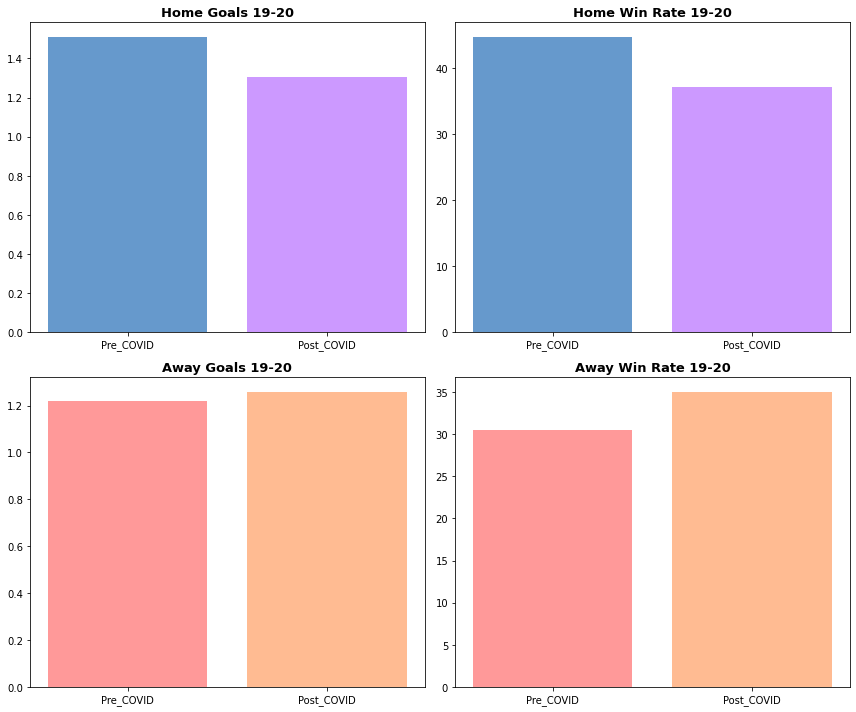

In [48]:
# QUICK SUMMARY OF ALL THE DATA GATHERED FROM THE MULTIPLE DATA TRANSFORMATIONS WE'VE DONE SO FAR:

# 1) AVG HG & AVG AG pre vs post: 

fig, axs = plt.subplots(2, 2, figsize=(12,10))

axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_19.AVG_HGF.mean(),E0_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
axs[0, 0].set_title('Home Goals 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_19.AVG_AGA.mean(),E0_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
axs[1, 0].set_title('Away Goals 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_19.Home_Winrate.mean(),E0_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
axs[0, 1].set_title('Home Win Rate 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_19.Away_Winrate.mean(),E0_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
axs[1, 1].set_title('Away Win Rate 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

fig.tight_layout()

print('Difference in Home Goals: ' + '{:.3f}'.format(E0_grouped_predata_19.AVG_HGF.mean() - E0_grouped_postdata.AVG_HGF.mean()))
print('Difference in Away Goals: ' + '{:.3f}'.format(E0_grouped_predata_19.AVG_AGA.mean() - E0_grouped_postdata.AVG_AGA.mean()))
print('Difference in Home Win Rate: ' + '{:.3f}'.format(E0_grouped_predata_19.Home_Winrate.mean() - E0_grouped_postdata.Home_Winrate.mean()))
print('Difference in Away Win Rate: ' + '{:.3f}'.format(E0_grouped_predata_19.Away_Winrate.mean() - E0_grouped_postdata.Away_Winrate.mean()))
print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(E0_grouped_predata_19.AVG_HGF.mean() - E0_grouped_predata_19.AVG_AGA.mean()))
print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(E0_grouped_postdata.AVG_HGF.mean() - E0_grouped_postdata.AVG_AGA.mean()))



Difference in Home Goals: 0.233
Difference in Away Goals: -0.053
Difference in Home Win Rate: 8.540
Difference in Away Win Rate: -4.692
Difference in HG - AG Pre-COVID: 0.334
Difference in HG - AG Post-COVID: 0.048


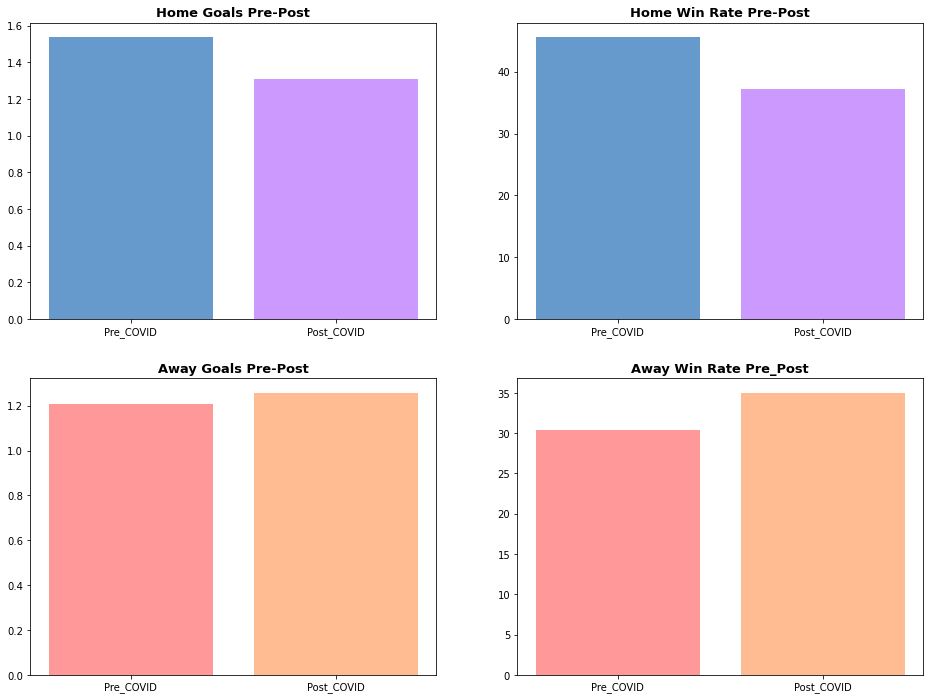

In [49]:

E0_all_predata = pd.concat([E0_grouped_predata_15, E0_grouped_predata_16, E0_grouped_predata_17,
                            E0_grouped_predata_18, E0_grouped_predata_19], axis = 0, join = 'inner')

E0_all_predata = E0_all_predata.sort_index()


fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_all_predata.AVG_HGF.mean(),E0_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
axs[0, 0].set_title('Home Goals Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_all_predata.AVG_AGA.mean(),E0_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
axs[1, 0].set_title('Away Goals Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_all_predata.Home_Winrate.mean(),E0_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
axs[0, 1].set_title('Home Win Rate Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_all_predata.Away_Winrate.mean(),E0_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
axs[1, 1].set_title('Away Win Rate Pre_Post', fontdict={'fontweight': 'bold', 'fontsize': 13})


print('Difference in Home Goals: ' + '{:.3f}'.format(E0_all_predata.AVG_HGF.mean() - E0_grouped_postdata.AVG_HGF.mean()))
print('Difference in Away Goals: ' + '{:.3f}'.format(E0_all_predata.AVG_AGA.mean() - E0_grouped_postdata.AVG_AGA.mean()))
print('Difference in Home Win Rate: ' + '{:.3f}'.format(E0_all_predata.Home_Winrate.mean() - E0_grouped_postdata.Home_Winrate.mean()))
print('Difference in Away Win Rate: ' + '{:.3f}'.format(E0_all_predata.Away_Winrate.mean() - E0_grouped_postdata.Away_Winrate.mean()))
print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(E0_all_predata.AVG_HGF.mean() - E0_all_predata.AVG_AGA.mean()))
print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(E0_grouped_postdata.AVG_HGF.mean() - E0_grouped_postdata.AVG_AGA.mean()))


In [50]:
# IDEAS FOR GRAPHS:

# 1) Total HG vs TOTAL AWAY GOALS grouped by team. BOTH PRE AND POST THEN TOGETHER IN ONE.    AVG
# 1.1) SAME BUT WITH AVGS. + ADD LINES WITH  Prediff_HGF_AGF & Postdiff_HGF_AGF.   AVG OVR TOTAL
# 1.2) COMPARISON BETWEEN LEAGUES IN THE FORMER PARAMETER

# 2) TOTAL pre AGA vs post AGA and TOTAL pre HGA vs TOTAL post HGA GROUPED BY TEAM.  AVGS 
# 2.1) COMPARISON BETWEEN LEAGUES WITH THE TOTAL AVG DIFFERENCE ( Diff_AGA_AGA & Diff_HGA_HGA)

#3) AVG HOME WINRATE VS AWAY WINRATE X team in PL.   ( Just for performance + visalization purposes)
#3.1) VISUALIZATION OF pre diff HW-AW  and Postdiff_HW_AW.  (Another Way to look at the parameter.)
#3.2) Comparison With the League


# LIST OF TEAMS IN COVID 

In [51]:
# The rest of the plots are here. Remove commented lines to visualize.  

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_18.AVG_HGF.mean(),E0_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_18.AVG_AGA.mean(),E0_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_18.Home_Winrate.mean(),E0_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_18.Away_Winrate.mean(),E0_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})


# fig.tight_layout()



# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_17.AVG_HGF.mean(),E0_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_17.AVG_AGA.mean(),E0_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_17.Home_Winrate.mean(),E0_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_17.Away_Winrate.mean(),E0_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})


# fig.tight_layout()


# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_16.AVG_HGF.mean(),E0_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_16.AVG_AGA.mean(),E0_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_16.Home_Winrate.mean(),E0_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_16.Away_Winrate.mean(),E0_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})


# fig.tight_layout()


# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_15.AVG_HGF.mean(),E0_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_15.AVG_AGA.mean(),E0_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_15.Home_Winrate.mean(),E0_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [E0_grouped_predata_15.Away_Winrate.mean(),E0_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})


# fig.tight_layout()




## CHECK YOUR PREMIER LEAGUE TEAM

In [53]:
# In this section, you'll be able to change team's name to check the teams performance in multiple metrics: 

# def get_team_stats(team_name):
#     team = fifa[fifa['Nationality']==country_name][['Name','Age','Overall','Club','Position','Value']].sort_values('Overall', ascending = False)
#     return country


# def get_club_stats(club_name):
#     club = fifa[fifa['Club']==club_name][['Name','Age','Nationality','Overall','Potential','Wage','Position','Value','Special']]
#     return club


# def get_player_stats(player_name):
#     player = fifa[fifa['Name']==player_name][attributes]
#     return player

# def player_full_bio(player_name):
#     bio = fifa.loc[(fifa['Name'] == player_name)]
#     pd.set_option('display.max_columns', 200)
#     return bio

# player_full_bio(input('Player Name : '))





Player Name : Messi


NameError: name 'fifa' is not defined

### SPANISH LEAGUE - LIGA SANTANDER  (SP1)

In [ ]:
SP1_all_data_15 = pd.read_csv('2015db/SP1.csv')
SP1_all_data_16 = pd.read_csv('2016db/SP1.csv')
SP1_all_data_17 = pd.read_csv('2017db/SP1.csv')
SP1_all_data_18 = pd.read_csv('2018db/SP1.csv')
                              
SP1_all_data_19 = pd.read_csv('2019db/SP1.csv')
SP1_all_data_20 = pd.read_csv('2020db/SP1.csv')
                              

SP1_data_15 = SP1_all_data_15[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
SP1_data_16 = SP1_all_data_16[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
SP1_data_17 = SP1_all_data_17[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
SP1_data_18 = SP1_all_data_18[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
                              


SP1_data_19 = SP1_all_data_19[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
SP1_data_20 = SP1_all_data_20[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]

SP1_data_19

In [ ]:

SP1_data_19['Home_Win'] = SP1_data_19['FTR'].apply(lambda x: 1 if x is 'H' else 0)
SP1_data_19['Home_Draw'] = SP1_data_19['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_19['Home_Loss'] = SP1_data_19['FTR'].apply(lambda x: 1 if x is 'A' else 0)


SP1_data_19['Away_Win'] = SP1_data_19['FTR'].apply(lambda x: 1 if x is 'A' else 0)
SP1_data_19['Away_Draw'] = SP1_data_19['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_19['Away_Loss'] = SP1_data_19['FTR'].apply(lambda x: 1 if x is 'H' else 0)

SP1_data_19 = SP1_data_19.drop(columns=['FTR'], axis = 1)


SP1_data_20['Home_Win'] = SP1_data_20['FTR'].apply(lambda x: 1 if x is 'H' else 0)
SP1_data_20['Home_Draw'] = SP1_data_20['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_20['Home_Loss'] = SP1_data_20['FTR'].apply(lambda x: 1 if x is 'A' else 0)


SP1_data_20['Away_Win'] = SP1_data_20['FTR'].apply(lambda x: 1 if x is 'A' else 0)
SP1_data_20['Away_Draw'] = SP1_data_20['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_20['Away_Loss'] = SP1_data_20['FTR'].apply(lambda x: 1 if x is 'H' else 0)

SP1_data_20 = SP1_data_20.drop(columns=['FTR'], axis = 1)

SP1_data_20


In [ ]:

SP1_data_15['Home_Win'] = SP1_data_15['FTR'].apply(lambda x: 1 if x is 'H' else 0)
SP1_data_15['Home_Draw'] = SP1_data_15['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_15['Home_Loss'] = SP1_data_15['FTR'].apply(lambda x: 1 if x is 'A' else 0)


SP1_data_15['Away_Win'] = SP1_data_15['FTR'].apply(lambda x: 1 if x is 'A' else 0)
SP1_data_15['Away_Draw'] = SP1_data_15['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_15['Away_Loss'] = SP1_data_15['FTR'].apply(lambda x: 1 if x is 'H' else 0)

SP1_data_15 = SP1_data_15.drop(columns=['FTR'], axis = 1)


SP1_data_16['Home_Win'] = SP1_data_16['FTR'].apply(lambda x: 1 if x is 'H' else 0)
SP1_data_16['Home_Draw'] = SP1_data_16['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_16['Home_Loss'] = SP1_data_16['FTR'].apply(lambda x: 1 if x is 'A' else 0)


SP1_data_16['Away_Win'] = SP1_data_16['FTR'].apply(lambda x: 1 if x is 'A' else 0)
SP1_data_16['Away_Draw'] = SP1_data_16['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_16['Away_Loss'] = SP1_data_16['FTR'].apply(lambda x: 1 if x is 'H' else 0)

SP1_data_16 = SP1_data_16.drop(columns=['FTR'], axis = 1)

SP1_data_17['Home_Win'] = SP1_data_17['FTR'].apply(lambda x: 1 if x is 'H' else 0)
SP1_data_17['Home_Draw'] = SP1_data_17['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_17['Home_Loss'] = SP1_data_17['FTR'].apply(lambda x: 1 if x is 'A' else 0)


SP1_data_17['Away_Win'] = SP1_data_17['FTR'].apply(lambda x: 1 if x is 'A' else 0)
SP1_data_17['Away_Draw'] = SP1_data_17['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_17['Away_Loss'] = SP1_data_17['FTR'].apply(lambda x: 1 if x is 'H' else 0)

SP1_data_17 = SP1_data_17.drop(columns=['FTR'], axis = 1)


SP1_data_18['Home_Win'] = SP1_data_18['FTR'].apply(lambda x: 1 if x is 'H' else 0)
SP1_data_18['Home_Draw'] = SP1_data_18['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_18['Home_Loss'] = SP1_data_18['FTR'].apply(lambda x: 1 if x is 'A' else 0)


SP1_data_18['Away_Win'] = SP1_data_18['FTR'].apply(lambda x: 1 if x is 'A' else 0)
SP1_data_18['Away_Draw'] = SP1_data_18['FTR'].apply(lambda x: 1 if x is 'D' else 0)
SP1_data_18['Away_Loss'] = SP1_data_18['FTR'].apply(lambda x: 1 if x is 'H' else 0)

SP1_data_18 = SP1_data_18.drop(columns=['FTR'], axis = 1)


In [ ]:
SP1_data_15['Date'] = pd.to_datetime(SP1_data_15['Date'], format= '%d/%m/%y')   # year format 15,  not 2016*
SP1_data_16['Date'] = pd.to_datetime(SP1_data_16['Date'], format= '%d/%m/%y')   # year format 16,  not 2016*
SP1_data_17['Date'] = pd.to_datetime(SP1_data_17['Date'], format= '%d/%m/%y')   # year format 17,  not 2016*
SP1_data_18['Date'] = pd.to_datetime(SP1_data_18['Date'], format= '%d/%m/%Y')


SP1_data_19['Date'] = pd.to_datetime(SP1_data_19['Date'], format= '%d/%m/%Y')
SP1_data_20['Date'] = pd.to_datetime(SP1_data_20['Date'], format= '%d/%m/%Y')

SP1_pre_data_19 = SP1_data_19.loc[(SP1_data_19['Date'] > '08/08/2019') & (SP1_data_19['Date'] < '2020/03/12')]
SP1_post_covid_19 = SP1_data_19.loc[270:]

SP1_post_covid = pd.concat([SP1_post_covid_19, SP1_data_20])

SP1_pre_data_19

SP1_home_pre = SP1_pre_data_19.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})

SP1_away_pre = SP1_pre_data_19.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})

SP1_home_post = SP1_post_covid.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})

SP1_away_post = SP1_post_covid.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})

SP1_grouped_predata_19 = pd.concat([SP1_home_pre, SP1_away_pre], axis = 1)

SP1_grouped_postdata = pd.concat([SP1_home_post, SP1_away_post], axis = 1)




SP1_total_pre_games = (SP1_grouped_predata_19['HomeTeam'].mean() + SP1_grouped_predata_19['AwayTeam'].mean()).round(0)
SP1_total_post_games = 76 - SP1_total_pre_games

SP1_grouped_predata_19.head(5)

In [ ]:

SP1_Home_15 = SP1_data_15.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
SP1_Away_15 = SP1_data_15.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
SP1_grouped_predata_15 = pd.concat([SP1_Home_15, SP1_Away_15], axis = 1)


SP1_Home_16 = SP1_data_16.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
SP1_Away_16 = SP1_data_16.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
SP1_grouped_predata_16 = pd.concat([SP1_Home_16, SP1_Away_16], axis = 1)


SP1_Home_17 = SP1_data_17.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                           'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
SP1_Away_17 = SP1_data_17.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
SP1_grouped_predata_17 = pd.concat([SP1_Home_16, SP1_Away_17], axis = 1)


SP1_Home_18 = SP1_data_18.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
SP1_Away_18 = SP1_data_18.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
SP1_grouped_predata_18 = pd.concat([SP1_Home_16, SP1_Away_18], axis = 1)




In [ ]:
pd.options.display.float_format = '{:,.3f}'.format

SP1_grouped_predata_19['Home_Winrate'] = SP1_grouped_predata_19['Home_Win'] / SP1_grouped_predata_19['HomeTeam'] * 100
SP1_grouped_predata_19['Away_Winrate'] = SP1_grouped_predata_19['Away_Win'] / SP1_grouped_predata_19['AwayTeam'] * 100


SP1_grouped_predata_19.columns = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']



SP1_grouped_postdata['Home_Winrate'] = SP1_grouped_postdata['Home_Win'] / SP1_grouped_postdata['HomeTeam'] * 100
SP1_grouped_postdata['Away_Winrate'] = SP1_grouped_postdata['Away_Win'] / SP1_grouped_postdata['AwayTeam'] * 100

SP1_grouped_postdata.columns = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']

SP1_grouped_predata_19.head(8)


pd.options.display.float_format = '{:,.3f}'.format

SP1_grouped_predata_15['Home_Winrate'] = SP1_grouped_predata_15['Home_Win'] / SP1_grouped_predata_15['HomeTeam'] * 100
SP1_grouped_predata_15['Away_Winrate'] = SP1_grouped_predata_15['Away_Win'] / SP1_grouped_predata_15['AwayTeam'] * 100

SP1_grouped_predata_16['Home_Winrate'] = SP1_grouped_predata_16['Home_Win'] / SP1_grouped_predata_16['HomeTeam'] * 100
SP1_grouped_predata_16['Away_Winrate'] = SP1_grouped_predata_16['Away_Win'] / SP1_grouped_predata_16['AwayTeam'] * 100

SP1_grouped_predata_17['Home_Winrate'] = SP1_grouped_predata_17['Home_Win'] / SP1_grouped_predata_17['HomeTeam'] * 100
SP1_grouped_predata_17['Away_Winrate'] = SP1_grouped_predata_17['Away_Win'] / SP1_grouped_predata_17['AwayTeam'] * 100

SP1_grouped_predata_18['Home_Winrate'] = SP1_grouped_predata_18['Home_Win'] / SP1_grouped_predata_18['HomeTeam'] * 100
SP1_grouped_predata_18['Away_Winrate'] = SP1_grouped_predata_18['Away_Win'] / SP1_grouped_predata_18['AwayTeam'] * 100


cols = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']

SP1_grouped_predata_15.columns = cols
SP1_grouped_predata_16.columns = cols
SP1_grouped_predata_17.columns = cols
SP1_grouped_predata_18.columns = cols

SP1_grouped_predata_19.head()


In [ ]:

pd.options.display.float_format = '{:,.1f}'.format


SP1_diff_19 = pd.concat([SP1_grouped_predata_19, SP1_grouped_postdata ], axis = 1)

# 1

SP1_diff_19['Prediff_HGF_AGA']  = SP1_grouped_predata_19['AVG_HGF'] - SP1_grouped_predata_19['AVG_AGA'] # Positive 
SP1_diff_19['Postdiff_HGF_AGA']  = SP1_grouped_postdata['AVG_HGF'] - SP1_grouped_postdata['AVG_AGA']  # Positive 

# 2

SP1_diff_19['Diff_AGA_AGA'] = SP1_grouped_postdata['AVG_AGA'] - SP1_grouped_predata_19['AVG_AGA']
SP1_diff_19['Diff_HGA_HGA'] = SP1_grouped_postdata['AVG_HGA'] - SP1_grouped_predata_19['AVG_HGA']


# 3 

SP1_diff_19['Prediff_HW_AW']  = (SP1_grouped_predata_19['Home_Winrate'] - SP1_grouped_predata_19['Away_Winrate']) / 100
SP1_diff_19['Postdiff_HW_AW'] = (SP1_grouped_postdata['Home_Winrate'] - SP1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

SP1_diff_19 = SP1_diff_19.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()

s = SP1_diff_19.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s




In [ ]:
#SP1_diff['Prediff_HGF_AGA'].mean()
SP1_diff_19['Postdiff_HGF_AGA'].mean()

#SP1_diff['Diff_AGA_AGA'].sum()
#SP1_diff['Diff_HGA_HGA'].sum()

#SP1_diff['Prediff_HW_AW'].mean()
#SP1_diff['Postdiff_HW_AW'].mean()




In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

SP1_diff_15 = pd.concat([SP1_grouped_predata_15, SP1_grouped_postdata ], axis = 1)

SP1_diff_15['Prediff_HGF_AGA']  = SP1_grouped_predata_15['AVG_HGF'] - SP1_grouped_predata_15['AVG_AGA'] # Positive 
SP1_diff_15['Postdiff_HGF_AGA']  = SP1_grouped_postdata['AVG_HGF'] - SP1_grouped_postdata['AVG_AGA']  # Positive 


SP1_diff_15['Diff_AGA_AGA'] = SP1_grouped_postdata['AVG_AGA'] - SP1_grouped_predata_15['AVG_AGA']
SP1_diff_15['Diff_HGA_HGA'] = SP1_grouped_postdata['AVG_HGA'] - SP1_grouped_predata_15['AVG_HGA']

SP1_diff_15['Prediff_HW_AW']  = (SP1_grouped_predata_15['Home_Winrate'] - SP1_grouped_predata_15['Away_Winrate'] ) /100
SP1_diff_15['Postdiff_HW_AW'] = (SP1_grouped_postdata['Home_Winrate'] - SP1_grouped_postdata['Away_Winrate']) / 100

SP1_diff_15['Pretotal_HG'] = SP1_grouped_predata_15['AVG_HGF'] * SP1_grouped_predata_15['Home_Games']
SP1_diff_15['Pretotal_AG'] = SP1_grouped_predata_15['AVG_AGA'] * SP1_grouped_predata_15['Away_Games']
SP1_diff_15['Postotal_HG'] = SP1_grouped_postdata['AVG_HGF'] * SP1_grouped_postdata['Home_Games']
SP1_diff_15['Postotal_AG'] = SP1_grouped_postdata['AVG_AGA'] * SP1_grouped_postdata['Away_Games']


SP1_diff_15 = SP1_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postotal_AG'].dropna()
#E0_diff_15 = E0_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = SP1_diff_15.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

SP1_diff_16 = pd.concat([SP1_grouped_predata_16, SP1_grouped_postdata ], axis = 1)

SP1_diff_16['Prediff_HGF_AGA']  = SP1_grouped_predata_16['AVG_HGF'] - SP1_grouped_predata_16['AVG_AGA'] # Positive 
SP1_diff_16['Postdiff_HGF_AGA']  = SP1_grouped_postdata['AVG_HGF'] - SP1_grouped_postdata['AVG_AGA']  # Positive 


SP1_diff_16['Diff_AGA_AGA'] = SP1_grouped_postdata['AVG_AGA'] - SP1_grouped_predata_16['AVG_AGA']
SP1_diff_16['Diff_HGA_HGA'] = SP1_grouped_postdata['AVG_HGA'] - SP1_grouped_predata_16['AVG_HGA']

SP1_diff_16['Prediff_HW_AW']  = (SP1_grouped_predata_16['Home_Winrate'] - SP1_grouped_predata_16['Away_Winrate'] ) /100
SP1_diff_16['Postdiff_HW_AW'] = (SP1_grouped_postdata['Home_Winrate'] - SP1_grouped_postdata['Away_Winrate']) / 100

SP1_diff_16['Pretotal_HG'] = SP1_grouped_predata_16['AVG_HGF'] * SP1_grouped_predata_16['Home_Games']
SP1_diff_16['Pretotal_AG'] = SP1_grouped_predata_16['AVG_AGA'] * SP1_grouped_predata_16['Away_Games']
SP1_diff_16['Postotal_HG'] = SP1_grouped_postdata['AVG_HGF'] * SP1_grouped_postdata['Home_Games']
SP1_diff_16['Postotal_AG'] = SP1_grouped_postdata['AVG_AGA'] * SP1_grouped_postdata['Away_Games']


SP1_diff_16 = SP1_diff_16.loc[:, 'Prediff_HGF_AGA' : 'Postotal_AG'].dropna()
#E0_diff_16 = E0_diff_16.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = SP1_diff_16.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

SP1_diff_17 = pd.concat([SP1_grouped_predata_17, SP1_grouped_postdata ], axis = 1)

SP1_diff_17['Prediff_HGF_AGA']  = SP1_grouped_predata_16['AVG_HGF'] - SP1_grouped_predata_17['AVG_AGA'] # Positive 
SP1_diff_17['Postdiff_HGF_AGA']  = SP1_grouped_postdata['AVG_HGF'] - SP1_grouped_postdata['AVG_AGA']  # Positive 


SP1_diff_17['Diff_AGA_AGA'] = SP1_grouped_postdata['AVG_AGA'] - SP1_grouped_predata_17['AVG_AGA']
SP1_diff_17['Diff_HGA_HGA'] = SP1_grouped_postdata['AVG_HGA'] - SP1_grouped_predata_17['AVG_HGA']

SP1_diff_17['Prediff_HW_AW']  = (SP1_grouped_predata_17['Home_Winrate'] - SP1_grouped_predata_17['Away_Winrate'] ) /100
SP1_diff_17['Postdiff_HW_AW'] = (SP1_grouped_postdata['Home_Winrate'] - SP1_grouped_postdata['Away_Winrate']) / 100

SP1_diff_17['Pretotal_HG'] = SP1_grouped_predata_17['AVG_HGF'] * SP1_grouped_predata_17['Home_Games']
SP1_diff_17['Pretotal_AG'] = SP1_grouped_predata_17['AVG_AGA'] * SP1_grouped_predata_17['Away_Games']
SP1_diff_17['Postotal_HG'] = SP1_grouped_postdata['AVG_HGF'] * SP1_grouped_postdata['Home_Games']
SP1_diff_17['Postotal_AG'] = SP1_grouped_postdata['AVG_AGA'] * SP1_grouped_postdata['Away_Games']


SP1_diff_17 = SP1_diff_17.loc[:, 'Prediff_HGF_AGA' : 'Postotal_AG'].dropna()
#E0_diff_17 = E0_diff_17.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = SP1_diff_17.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

SP1_diff_18 = pd.concat([SP1_grouped_predata_18, SP1_grouped_postdata ], axis = 1)

SP1_diff_18['Prediff_HGF_AGA']  = SP1_grouped_predata_18['AVG_HGF'] - SP1_grouped_predata_18['AVG_AGA'] # Positive 
SP1_diff_18['Postdiff_HGF_AGA']  = SP1_grouped_postdata['AVG_HGF'] - SP1_grouped_postdata['AVG_AGA']  # Positive 


SP1_diff_18['Diff_AGA_AGA'] = SP1_grouped_postdata['AVG_AGA'] - SP1_grouped_predata_18['AVG_AGA']
SP1_diff_18['Diff_HGA_HGA'] = SP1_grouped_postdata['AVG_HGA'] - SP1_grouped_predata_18['AVG_HGA']

SP1_diff_18['Prediff_HW_AW']  = (SP1_grouped_predata_16['Home_Winrate'] - SP1_grouped_predata_18['Away_Winrate'] ) /100
SP1_diff_18['Postdiff_HW_AW'] = (SP1_grouped_postdata['Home_Winrate'] - SP1_grouped_postdata['Away_Winrate']) / 100

SP1_diff_18['Pretotal_HG'] = SP1_grouped_predata_18['AVG_HGF'] * SP1_grouped_predata_18['Home_Games']
SP1_diff_18['Pretotal_AG'] = SP1_grouped_predata_18['AVG_AGA'] * SP1_grouped_predata_18['Away_Games']
SP1_diff_18['Postotal_HG'] = SP1_grouped_postdata['AVG_HGF'] * SP1_grouped_postdata['Home_Games']
SP1_diff_18['Postotal_AG'] = SP1_grouped_postdata['AVG_AGA'] * SP1_grouped_postdata['Away_Games']


SP1_diff_18 = SP1_diff_18.loc[:, 'Prediff_HGF_AGA' : 'Postotal_AG'].dropna()
#E0_diff_15 = E0_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = SP1_diff_18.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))

axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_19.AVG_HGF.mean(),SP1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
axs[0, 0].set_title('Home Goals 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_19.AVG_AGA.mean(),SP1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
axs[1, 0].set_title('Away Goals 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_19.Home_Winrate.mean(),SP1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
axs[0, 1].set_title('Home Win Rate 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_19.Away_Winrate.mean(),SP1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
axs[1, 1].set_title('Away Win Rate 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

fig.tight_layout()

print('Difference in Home Goals: ' + '{:.3f}'.format(SP1_grouped_predata_19.AVG_HGF.mean() - SP1_grouped_postdata.AVG_HGF.mean()))
print('Difference in Away Goals: ' + '{:.3f}'.format(SP1_grouped_predata_19.AVG_AGA.mean() - SP1_grouped_postdata.AVG_AGA.mean()))
print('Difference in Home Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_19.Home_Winrate.mean() - SP1_grouped_postdata.Home_Winrate.mean()))
print('Difference in Away Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_19.Away_Winrate.mean() - SP1_grouped_postdata.Away_Winrate.mean()))
print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(SP1_grouped_predata_19.AVG_HGF.mean() - SP1_grouped_predata_19.AVG_AGA.mean()))
print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(SP1_grouped_postdata.AVG_HGF.mean() - SP1_grouped_postdata.AVG_AGA.mean()))


In [ ]:
SP1_all_predata = pd.concat([SP1_grouped_predata_15, SP1_grouped_predata_16, SP1_grouped_predata_17,
                            SP1_grouped_predata_18, SP1_grouped_predata_19], axis = 0, join = 'inner')

SP1_all_predata = SP1_all_predata.sort_index()


fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_all_predata.AVG_HGF.mean(),SP1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
axs[0, 0].set_title('Home Goals Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_all_predata.AVG_AGA.mean(),SP1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
axs[1, 0].set_title('Away Goals Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_all_predata.Home_Winrate.mean(),SP1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
axs[0, 1].set_title('Home Win Rate Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_all_predata.Away_Winrate.mean(),SP1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
axs[1, 1].set_title('Away Win Rate Pre_Post', fontdict={'fontweight': 'bold', 'fontsize': 13})


print('Difference in Home Goals: ' + '{:.3f}'.format(SP1_all_predata.AVG_HGF.mean() - SP1_grouped_postdata.AVG_HGF.mean()))
print('Difference in Away Goals: ' + '{:.3f}'.format(SP1_all_predata.AVG_AGA.mean() - SP1_grouped_postdata.AVG_AGA.mean()))
print('Difference in Home Win Rate: ' + '{:.3f}'.format(SP1_all_predata.Home_Winrate.mean() - SP1_grouped_postdata.Home_Winrate.mean()))
print('Difference in Away Win Rate: ' + '{:.3f}'.format(SP1_all_predata.Away_Winrate.mean() - SP1_grouped_postdata.Away_Winrate.mean()))
print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(SP1_all_predata.AVG_HGF.mean() - SP1_all_predata.AVG_AGA.mean()))
print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(SP1_grouped_postdata.AVG_HGF.mean() - SP1_grouped_postdata.AVG_AGA.mean()))


In [ ]:
# # 2015 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_15.AVG_HGF.mean(),SP1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_15.AVG_AGA.mean(),SP1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_15.Home_Winrate.mean(),SP1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_15.Away_Winrate.mean(),SP1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(SP1_grouped_predata_15.AVG_HGF.mean() - SP1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(SP1_grouped_predata_15.AVG_AGA.mean() - SP1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_15.Home_Winrate.mean() - SP1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_15.Away_Winrate.mean() - SP1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(SP1_grouped_predata_15.AVG_HGF.mean() - SP1_grouped_predata_15.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(SP1_grouped_postdata.AVG_HGF.mean() - SP1_grouped_postdata.AVG_AGA.mean()))

# # 2016 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_16.AVG_HGF.mean(),SP1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_16.AVG_AGA.mean(),SP1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_16.Home_Winrate.mean(),SP1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_16.Away_Winrate.mean(),SP1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(SP1_grouped_predata_16.AVG_HGF.mean() - SP1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(SP1_grouped_predata_16.AVG_AGA.mean() - SP1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_16.Home_Winrate.mean() - SP1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_16.Away_Winrate.mean() - SP1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(SP1_grouped_predata_16.AVG_HGF.mean() - SP1_grouped_predata_16.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(SP1_grouped_postdata.AVG_HGF.mean() - SP1_grouped_postdata.AVG_AGA.mean()))

# # 2017 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_17.AVG_HGF.mean(),SP1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_17.AVG_AGA.mean(),SP1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_17.Home_Winrate.mean(),SP1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_17.Away_Winrate.mean(),SP1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(SP1_grouped_predata_17.AVG_HGF.mean() - SP1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(SP1_grouped_predata_17.AVG_AGA.mean() - SP1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_17.Home_Winrate.mean() - SP1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_17.Away_Winrate.mean() - SP1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(SP1_grouped_predata_17.AVG_HGF.mean() - SP1_grouped_predata_17.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(SP1_grouped_postdata.AVG_HGF.mean() - SP1_grouped_postdata.AVG_AGA.mean()))

# # 2018 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_18.AVG_HGF.mean(),SP1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_18.AVG_AGA.mean(),SP1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_18.Home_Winrate.mean(),SP1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [SP1_grouped_predata_18.Away_Winrate.mean(),SP1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(SP1_grouped_predata_18.AVG_HGF.mean() - SP1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(SP1_grouped_predata_18.AVG_AGA.mean() - SP1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_18.Home_Winrate.mean() - SP1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(SP1_grouped_predata_18.Away_Winrate.mean() - SP1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(SP1_grouped_predata_18.AVG_HGF.mean() - SP1_grouped_predata_18.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(SP1_grouped_postdata.AVG_HGF.mean() - SP1_grouped_postdata.AVG_AGA.mean()))


### GERMAN LEAGUE - BUNDESLIGA (D1)

In [ ]:
D1_all_data_15 = pd.read_csv('2015db/D1.csv')
D1_all_data_16 = pd.read_csv('2016db/D1.csv')
D1_all_data_17 = pd.read_csv('2017db/D1.csv')
D1_all_data_18 = pd.read_csv('2018db/D1.csv')

D1_all_data_19 = pd.read_csv('2019db/D1.csv')
D1_all_data_20 = pd.read_csv('2020db/D1.csv')

D1_data_15 = D1_all_data_15[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
D1_data_16 = D1_all_data_16[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
D1_data_17 = D1_all_data_17[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
D1_data_18 = D1_all_data_18[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]

D1_data_19 = D1_all_data_19[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
D1_data_20 = D1_all_data_20[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]

D1_data_19


In [ ]:
D1_data_15['Home_Win'] = D1_data_15['FTR'].apply(lambda x: 1 if x is 'H' else 0)
D1_data_15['Home_Draw'] = D1_data_15['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_15['Home_Loss'] = D1_data_15['FTR'].apply(lambda x: 1 if x is 'A' else 0)


D1_data_15['Away_Win'] = D1_data_15['FTR'].apply(lambda x: 1 if x is 'A' else 0)
D1_data_15['Away_Draw'] = D1_data_15['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_15['Away_Loss'] = D1_data_15['FTR'].apply(lambda x: 1 if x is 'H' else 0)

D1_data_15 = D1_data_15.drop(columns=['FTR'], axis = 1)


D1_data_16['Home_Win'] = D1_data_16['FTR'].apply(lambda x: 1 if x is 'H' else 0)
D1_data_16['Home_Draw'] = D1_data_16['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_16['Home_Loss'] = D1_data_16['FTR'].apply(lambda x: 1 if x is 'A' else 0)

D1_data_16['Away_Win'] = D1_data_16['FTR'].apply(lambda x: 1 if x is 'A' else 0)
D1_data_16['Away_Draw'] = D1_data_16['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_16['Away_Loss'] = D1_data_16['FTR'].apply(lambda x: 1 if x is 'H' else 0)

D1_data_16 = D1_data_16.drop(columns=['FTR'], axis = 1)

D1_data_17['Home_Win'] = D1_data_17['FTR'].apply(lambda x: 1 if x is 'H' else 0)
D1_data_17['Home_Draw'] = D1_data_17['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_17['Home_Loss'] = D1_data_17['FTR'].apply(lambda x: 1 if x is 'A' else 0)

D1_data_17['Away_Win'] = D1_data_17['FTR'].apply(lambda x: 1 if x is 'A' else 0)
D1_data_17['Away_Draw'] = D1_data_17['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_17['Away_Loss'] = D1_data_17['FTR'].apply(lambda x: 1 if x is 'H' else 0)

D1_data_17 = D1_data_17.drop(columns=['FTR'], axis = 1)


D1_data_18['Home_Win'] = D1_data_18['FTR'].apply(lambda x: 1 if x is 'H' else 0)
D1_data_18['Home_Draw'] = D1_data_18['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_18['Home_Loss'] = D1_data_18['FTR'].apply(lambda x: 1 if x is 'A' else 0)

D1_data_18['Away_Win'] = D1_data_18['FTR'].apply(lambda x: 1 if x is 'A' else 0)
D1_data_18['Away_Draw'] = D1_data_18['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_18['Away_Loss'] = D1_data_18['FTR'].apply(lambda x: 1 if x is 'H' else 0)

D1_data_18 = D1_data_18.drop(columns=['FTR'], axis = 1)


D1_data_19['Home_Win'] = D1_data_19['FTR'].apply(lambda x: 1 if x is 'H' else 0)
D1_data_19['Home_Draw'] = D1_data_19['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_19['Home_Loss'] = D1_data_19['FTR'].apply(lambda x: 1 if x is 'A' else 0)


D1_data_19['Away_Win'] = D1_data_19['FTR'].apply(lambda x: 1 if x is 'A' else 0)
D1_data_19['Away_Draw'] = D1_data_19['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_19['Away_Loss'] = D1_data_19['FTR'].apply(lambda x: 1 if x is 'H' else 0)

D1_data_19 = D1_data_19.drop(columns=['FTR'], axis = 1)


D1_data_20['Home_Win'] = D1_data_20['FTR'].apply(lambda x: 1 if x is 'H' else 0)
D1_data_20['Home_Draw'] = D1_data_20['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_20['Home_Loss'] = D1_data_20['FTR'].apply(lambda x: 1 if x is 'A' else 0)


D1_data_20['Away_Win'] = D1_data_20['FTR'].apply(lambda x: 1 if x is 'A' else 0)
D1_data_20['Away_Draw'] = D1_data_20['FTR'].apply(lambda x: 1 if x is 'D' else 0)
D1_data_20['Away_Loss'] = D1_data_20['FTR'].apply(lambda x: 1 if x is 'H' else 0)

D1_data_20 = D1_data_20.drop(columns=['FTR'], axis = 1)

D1_data_20


In [ ]:
D1_data_15['Date'] = pd.to_datetime(SP1_data_15['Date'], format= '%d/%m/%Y')
D1_data_16['Date'] = pd.to_datetime(SP1_data_16['Date'], format= '%d/%m/%Y')
D1_data_17['Date'] = pd.to_datetime(SP1_data_17['Date'], format= '%d/%m/%Y')
D1_data_18['Date'] = pd.to_datetime(SP1_data_18['Date'], format= '%d/%m/%Y')

D1_data_19['Date'] = pd.to_datetime(SP1_data_19['Date'], format= '%d/%m/%Y')
D1_data_20['Date'] = pd.to_datetime(SP1_data_20['Date'], format= '%d/%m/%Y')

D1_pre_data_19 = D1_data_19.loc[(D1_data_19['Date'] > '08/08/2019') & (D1_data_19['Date'] < '2020/03/12')]

D1_post_covid_19 = D1_data_19.loc[270:]

D1_post_covid = pd.concat([D1_post_covid_19, D1_data_20])

D1_pre_data_19

D1_home_pre = D1_pre_data_19.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})

D1_away_pre = D1_pre_data_19.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})

D1_home_post = D1_post_covid.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})

D1_away_post = D1_post_covid.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})

D1_grouped_predata_19 = pd.concat([D1_home_pre, D1_away_pre], axis = 1)

D1_grouped_postdata = pd.concat([D1_home_post, D1_away_post], axis = 1)

D1_total_pre_games = (D1_grouped_predata_19['HomeTeam'].mean() + D1_grouped_predata_19['AwayTeam'].mean()).round(0)
D1_total_post_games = 68 - D1_total_pre_games

D1_grouped_predata_19.head(5)


In [ ]:
D1_Home_15 = D1_data_15.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
D1_Away_15 = D1_data_15.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
D1_grouped_predata_15 = pd.concat([D1_Home_15, D1_Away_15], axis = 1)


D1_Home_16 = D1_data_16.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
D1_Away_16 = D1_data_16.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
D1_grouped_predata_16 = pd.concat([D1_Home_16, D1_Away_16], axis = 1)


D1_Home_17 = D1_data_17.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                           'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
D1_Away_17 = D1_data_17.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
D1_grouped_predata_17 = pd.concat([D1_Home_17, D1_Away_17], axis = 1)


D1_Home_18 = D1_data_18.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'}) 
D1_Away_18 = D1_data_18.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
D1_grouped_predata_18 = pd.concat([D1_Home_18, D1_Away_18], axis = 1)


In [ ]:
pd.options.display.float_format = '{:,.3f}'.format

D1_grouped_predata_19['Home_Winrate'] = D1_grouped_predata_19['Home_Win'] / D1_grouped_predata_19['HomeTeam'] * 100
D1_grouped_predata_19['Away_Winrate'] = D1_grouped_predata_19['Away_Win'] / D1_grouped_predata_19['AwayTeam'] * 100


D1_grouped_predata_19.columns = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']



D1_grouped_postdata['Home_Winrate'] = D1_grouped_postdata['Home_Win'] / D1_grouped_postdata['HomeTeam'] * 100
D1_grouped_postdata['Away_Winrate'] = D1_grouped_postdata['Away_Win'] / D1_grouped_postdata['AwayTeam'] * 100

D1_grouped_postdata.columns = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']

D1_grouped_predata_19


pd.options.display.float_format = '{:,.3f}'.format

D1_grouped_predata_15['Home_Winrate'] = D1_grouped_predata_15['Home_Win'] / D1_grouped_predata_15['HomeTeam'] * 100
D1_grouped_predata_15['Away_Winrate'] = D1_grouped_predata_15['Away_Win'] / D1_grouped_predata_15['AwayTeam'] * 100

D1_grouped_predata_16['Home_Winrate'] = D1_grouped_predata_16['Home_Win'] / D1_grouped_predata_16['HomeTeam'] * 100
D1_grouped_predata_16['Away_Winrate'] = D1_grouped_predata_16['Away_Win'] / D1_grouped_predata_16['AwayTeam'] * 100

D1_grouped_predata_17['Home_Winrate'] = D1_grouped_predata_17['Home_Win'] / D1_grouped_predata_17['HomeTeam'] * 100
D1_grouped_predata_17['Away_Winrate'] = D1_grouped_predata_17['Away_Win'] / D1_grouped_predata_17['AwayTeam'] * 100

D1_grouped_predata_18['Home_Winrate'] = D1_grouped_predata_18['Home_Win'] / D1_grouped_predata_18['HomeTeam'] * 100
D1_grouped_predata_18['Away_Winrate'] = D1_grouped_predata_18['Away_Win'] / D1_grouped_predata_18['AwayTeam'] * 100


cols = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']

D1_grouped_predata_15.columns = cols
D1_grouped_predata_16.columns = cols
D1_grouped_predata_17.columns = cols
D1_grouped_predata_18.columns = cols

D1_grouped_predata_19.head()


In [ ]:

pd.options.display.float_format = '{:,.1f}'.format


D1_diff_19 = pd.concat([D1_grouped_predata_19, D1_grouped_postdata ], axis = 1)

# 1

D1_diff_19['Prediff_HGF_AGA']  = D1_grouped_predata_19['AVG_HGF'] - D1_grouped_predata_19['AVG_AGA'] # Positive 
D1_diff_19['Postdiff_HGF_AGA']  = D1_grouped_postdata['AVG_HGF'] - D1_grouped_postdata['AVG_AGA']  # Positive 

# 2

D1_diff_19['Diff_AGA_AGA'] = D1_grouped_postdata['AVG_AGA'] - D1_grouped_predata_19['AVG_AGA']
D1_diff_19['Diff_HGA_HGA'] = D1_grouped_postdata['AVG_HGA'] - D1_grouped_predata_19['AVG_HGA']

# 3 

D1_diff_19['Prediff_HW_AW']  = (D1_grouped_predata_19['Home_Winrate'] - D1_grouped_predata_19['Away_Winrate']) / 100
D1_diff_19['Postdiff_HW_AW'] = (D1_grouped_postdata['Home_Winrate'] - D1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

D1_diff_19= D1_diff_19.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = D1_diff_19.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


In [ ]:

pd.options.display.float_format = '{:,.1f}'.format


D1_diff_15 = pd.concat([D1_grouped_predata_15, D1_grouped_postdata ], axis = 1)

# 1

D1_diff_15['Prediff_HGF_AGA']  = D1_grouped_predata_15['AVG_HGF'] - D1_grouped_predata_15['AVG_AGA'] # Positive 
D1_diff_15['Postdiff_HGF_AGA']  = D1_grouped_postdata['AVG_HGF'] - D1_grouped_postdata['AVG_AGA']  # Positive 

# 2

D1_diff_15['Diff_AGA_AGA'] = D1_grouped_postdata['AVG_AGA'] - D1_grouped_predata_15['AVG_AGA']
D1_diff_15['Diff_HGA_HGA'] = D1_grouped_postdata['AVG_HGA'] - D1_grouped_predata_15['AVG_HGA']

# 3 

D1_diff_15['Prediff_HW_AW']  = (D1_grouped_predata_15['Home_Winrate'] - D1_grouped_predata_15['Away_Winrate']) / 100
D1_diff_15['Postdiff_HW_AW'] = (D1_grouped_postdata['Home_Winrate'] - D1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

D1_diff_15= D1_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = D1_diff_15.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


In [ ]:

pd.options.display.float_format = '{:,.1f}'.format


D1_diff_16 = pd.concat([D1_grouped_predata_16, D1_grouped_postdata ], axis = 1)

# 1

D1_diff_16['Prediff_HGF_AGA']  = D1_grouped_predata_16['AVG_HGF'] - D1_grouped_predata_16['AVG_AGA'] # Positive 
D1_diff_16['Postdiff_HGF_AGA']  = D1_grouped_postdata['AVG_HGF'] - D1_grouped_postdata['AVG_AGA']  # Positive 

# 2

D1_diff_16['Diff_AGA_AGA'] = D1_grouped_postdata['AVG_AGA'] - D1_grouped_predata_16['AVG_AGA']
D1_diff_16['Diff_HGA_HGA'] = D1_grouped_postdata['AVG_HGA'] - D1_grouped_predata_16['AVG_HGA']

# 3 

D1_diff_16['Prediff_HW_AW']  = (D1_grouped_predata_16['Home_Winrate'] - D1_grouped_predata_16['Away_Winrate']) / 100
D1_diff_16['Postdiff_HW_AW'] = (D1_grouped_postdata['Home_Winrate'] - D1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

D1_diff_16= D1_diff_16.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = D1_diff_16.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s

In [ ]:
pd.options.display.float_format = '{:,.1f}'.format


D1_diff_17 = pd.concat([D1_grouped_predata_17, D1_grouped_postdata ], axis = 1)

# 1

D1_diff_17['Prediff_HGF_AGA']  = D1_grouped_predata_17['AVG_HGF'] - D1_grouped_predata_17['AVG_AGA'] # Positive 
D1_diff_17['Postdiff_HGF_AGA']  = D1_grouped_postdata['AVG_HGF'] - D1_grouped_postdata['AVG_AGA']  # Positive 

# 2

D1_diff_17['Diff_AGA_AGA'] = D1_grouped_postdata['AVG_AGA'] - D1_grouped_predata_17['AVG_AGA']
D1_diff_17['Diff_HGA_HGA'] = D1_grouped_postdata['AVG_HGA'] - D1_grouped_predata_17['AVG_HGA']

# 3 

D1_diff_17['Prediff_HW_AW']  = (D1_grouped_predata_17['Home_Winrate'] - D1_grouped_predata_17['Away_Winrate']) / 100
D1_diff_17['Postdiff_HW_AW'] = (D1_grouped_postdata['Home_Winrate'] - D1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

D1_diff_17= D1_diff_17.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = D1_diff_17.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s

In [ ]:
pd.options.display.float_format = '{:,.1f}'.format


D1_diff_18 = pd.concat([D1_grouped_predata_18, D1_grouped_postdata ], axis = 1)

# 1

D1_diff_18['Prediff_HGF_AGA']  = D1_grouped_predata_18['AVG_HGF'] - D1_grouped_predata_18['AVG_AGA'] # Positive 
D1_diff_18['Postdiff_HGF_AGA']  = D1_grouped_postdata['AVG_HGF'] - D1_grouped_postdata['AVG_AGA']  # Positive 

# 2

D1_diff_18['Diff_AGA_AGA'] = D1_grouped_postdata['AVG_AGA'] - D1_grouped_predata_18['AVG_AGA']
D1_diff_18['Diff_HGA_HGA'] = D1_grouped_postdata['AVG_HGA'] - D1_grouped_predata_18['AVG_HGA']

# 3 

D1_diff_18['Prediff_HW_AW']  = (D1_grouped_predata_18['Home_Winrate'] - D1_grouped_predata_18['Away_Winrate']) / 100
D1_diff_18['Postdiff_HW_AW'] = (D1_grouped_postdata['Home_Winrate'] - D1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

D1_diff_18= D1_diff_18.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()


s = D1_diff_18.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s

In [ ]:
#D1_diff['Prediff_HGF_AGA'].mean()
D1_diff['Postdiff_HGF_AGA'].mean()

#D1_diff['Diff_AGA_AGA'].mean()
#D1_diff['Diff_HGA_HGA'].mean()

#D1_diff['Prediff_HW_AW'].mean()
#D1_diff['Postdiff_HW_AW'].mean()


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))

axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_19.AVG_HGF.mean(),SP1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
axs[0, 0].set_title('Home Goals 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_19.AVG_AGA.mean(),SP1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
axs[1, 0].set_title('Away Goals 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_19.Home_Winrate.mean(),SP1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
axs[0, 1].set_title('Home Win Rate 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_19.Away_Winrate.mean(),SP1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
axs[1, 1].set_title('Away Win Rate 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

fig.tight_layout()

print('Difference in Home Goals: ' + '{:.3f}'.format(D1_grouped_predata_19.AVG_HGF.mean() - D1_grouped_postdata.AVG_HGF.mean()))
print('Difference in Away Goals: ' + '{:.3f}'.format(D1_grouped_predata_19.AVG_AGA.mean() - D1_grouped_postdata.AVG_AGA.mean()))
print('Difference in Home Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_19.Home_Winrate.mean() - D1_grouped_postdata.Home_Winrate.mean()))
print('Difference in Away Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_19.Away_Winrate.mean() - D1_grouped_postdata.Away_Winrate.mean()))
print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(D1_grouped_predata_19.AVG_HGF.mean() - D1_grouped_predata_19.AVG_AGA.mean()))
print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(D1_grouped_postdata.AVG_HGF.mean() - D1_grouped_postdata.AVG_AGA.mean()))


In [ ]:
D1_all_predata = pd.concat([D1_grouped_predata_15, D1_grouped_predata_16, D1_grouped_predata_17,
                            D1_grouped_predata_18, D1_grouped_predata_19], axis = 0, join = 'inner')

D1_all_predata = D1_all_predata.sort_index()


fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_all_predata.AVG_HGF.mean(),D1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
axs[0, 0].set_title('Home Goals Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_all_predata.AVG_AGA.mean(),D1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
axs[1, 0].set_title('Away Goals Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_all_predata.Home_Winrate.mean(),D1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
axs[0, 1].set_title('Home Win Rate Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_all_predata.Away_Winrate.mean(),D1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
axs[1, 1].set_title('Away Win Rate Pre_Post', fontdict={'fontweight': 'bold', 'fontsize': 13})


print('Difference in Home Goals: ' + '{:.3f}'.format(D1_all_predata.AVG_HGF.mean() - D1_grouped_postdata.AVG_HGF.mean()))
print('Difference in Away Goals: ' + '{:.3f}'.format(D1_all_predata.AVG_AGA.mean() - D1_grouped_postdata.AVG_AGA.mean()))
print('Difference in Home Win Rate: ' + '{:.3f}'.format(D1_all_predata.Home_Winrate.mean() - D1_grouped_postdata.Home_Winrate.mean()))
print('Difference in Away Win Rate: ' + '{:.3f}'.format(D1_all_predata.Away_Winrate.mean() - D1_grouped_postdata.Away_Winrate.mean()))
print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(D1_all_predata.AVG_HGF.mean() - D1_all_predata.AVG_AGA.mean()))
print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(D1_grouped_postdata.AVG_HGF.mean() - D1_grouped_postdata.AVG_AGA.mean()))


In [ ]:
# # 2015 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_15.AVG_HGF.mean(),D1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_15.AVG_AGA.mean(),D1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_15.Home_Winrate.mean(),D1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_15.Away_Winrate.mean(),D1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(D1_grouped_predata_15.AVG_HGF.mean() - D1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(D1_grouped_predata_15.AVG_AGA.mean() - D1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_15.Home_Winrate.mean() - D1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_15.Away_Winrate.mean() - D1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(D1_grouped_predata_15.AVG_HGF.mean() - D1_grouped_predata_15.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(D1_grouped_postdata.AVG_HGF.mean() - D1_grouped_postdata.AVG_AGA.mean()))

# # 2016 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_16.AVG_HGF.mean(),D1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_16.AVG_AGA.mean(),D1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_16.Home_Winrate.mean(),D1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_16.Away_Winrate.mean(),D1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(D1_grouped_predata_16.AVG_HGF.mean() - D1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(D1_grouped_predata_16.AVG_AGA.mean() - D1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_16.Home_Winrate.mean() - D1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_16.Away_Winrate.mean() - D1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(D1_grouped_predata_16.AVG_HGF.mean() - D1_grouped_predata_16.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(D1_grouped_postdata.AVG_HGF.mean() - D1_grouped_postdata.AVG_AGA.mean()))

# # 2017 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_17.AVG_HGF.mean(),D1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_17.AVG_AGA.mean(),D1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_17.Home_Winrate.mean(),D1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_17.Away_Winrate.mean(),D1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(D1_grouped_predata_17.AVG_HGF.mean() - D1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(D1_grouped_predata_17.AVG_AGA.mean() - D1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_17.Home_Winrate.mean() - D1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_17.Away_Winrate.mean() - D1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(D1_grouped_predata_17.AVG_HGF.mean() - D1_grouped_predata_17.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(D1_grouped_postdata.AVG_HGF.mean() - D1_grouped_postdata.AVG_AGA.mean()))

# # 2018 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_18.AVG_HGF.mean(),D1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_18.AVG_AGA.mean(),D1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_18.Home_Winrate.mean(),D1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [D1_grouped_predata_18.Away_Winrate.mean(),D1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(D1_grouped_predata_18.AVG_HGF.mean() - D1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(D1_grouped_predata_18.AVG_AGA.mean() - D1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_18.Home_Winrate.mean() - D1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(D1_grouped_predata_18.Away_Winrate.mean() - D1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(D1_grouped_predata_18.AVG_HGF.mean() - D1_grouped_predata_18.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(D1_grouped_postdata.AVG_HGF.mean() - D1_grouped_postdata.AVG_AGA.mean()))


## ITALIA SERIE A - (I1)

In [ ]:
I1_all_data_15 = pd.read_csv('2019db/I1.csv')
I1_all_data_16 = pd.read_csv('2016db/I1.csv')
I1_all_data_17 = pd.read_csv('2017db/I1.csv')
I1_all_data_18 = pd.read_csv('2018db/I1.csv')

I1_all_data_19 = pd.read_csv('2019db/I1.csv')
I1_all_data_20 = pd.read_csv('2020db/I1.csv')

I1_data_15 = I1_all_data_15[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
I1_data_16 = I1_all_data_16[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
I1_data_17 = I1_all_data_17[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
I1_data_18 = I1_all_data_18[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]

I1_data_19 = I1_all_data_19[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]
I1_data_20 = I1_all_data_20[['Div', 'Date', 'HomeTeam', 'AwayTeam','FTHG', 'FTAG', 'FTR']]



I1_data_15['Home_Win'] = I1_data_15['FTR'].apply(lambda x: 1 if x is 'H' else 0)
I1_data_15['Home_Draw'] = I1_data_15['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_15['Home_Loss'] = I1_data_15['FTR'].apply(lambda x: 1 if x is 'A' else 0)


I1_data_15['Away_Win'] = I1_data_15['FTR'].apply(lambda x: 1 if x is 'A' else 0)
I1_data_15['Away_Draw'] = I1_data_15['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_15['Away_Loss'] = I1_data_15['FTR'].apply(lambda x: 1 if x is 'H' else 0)

I1_data_15 = I1_data_15.drop(columns=['FTR'], axis = 1)


I1_data_16['Home_Win'] = I1_data_16['FTR'].apply(lambda x: 1 if x is 'H' else 0)
I1_data_16['Home_Draw'] = I1_data_16['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_16['Home_Loss'] = I1_data_16['FTR'].apply(lambda x: 1 if x is 'A' else 0)


I1_data_16['Away_Win'] = I1_data_16['FTR'].apply(lambda x: 1 if x is 'A' else 0)
I1_data_16['Away_Draw'] = I1_data_16['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_16['Away_Loss'] = I1_data_16['FTR'].apply(lambda x: 1 if x is 'H' else 0)

I1_data_16 = I1_data_16.drop(columns=['FTR'], axis = 1)


I1_data_17['Home_Win'] = I1_data_17['FTR'].apply(lambda x: 1 if x is 'H' else 0)
I1_data_17['Home_Draw'] = I1_data_17['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_17['Home_Loss'] = I1_data_17['FTR'].apply(lambda x: 1 if x is 'A' else 0)


I1_data_17['Away_Win'] = I1_data_17['FTR'].apply(lambda x: 1 if x is 'A' else 0)
I1_data_17['Away_Draw'] = I1_data_17['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_17['Away_Loss'] = I1_data_17['FTR'].apply(lambda x: 1 if x is 'H' else 0)

I1_data_17 = I1_data_17.drop(columns=['FTR'], axis = 1)


I1_data_18['Home_Win'] = I1_data_18['FTR'].apply(lambda x: 1 if x is 'H' else 0)
I1_data_18['Home_Draw'] = I1_data_18['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_18['Home_Loss'] = I1_data_18['FTR'].apply(lambda x: 1 if x is 'A' else 0)


I1_data_18['Away_Win'] = I1_data_18['FTR'].apply(lambda x: 1 if x is 'A' else 0)
I1_data_18['Away_Draw'] = I1_data_18['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_18['Away_Loss'] = I1_data_18['FTR'].apply(lambda x: 1 if x is 'H' else 0)

I1_data_18 = I1_data_18.drop(columns=['FTR'], axis = 1)


I1_data_19['Home_Win'] = I1_data_19['FTR'].apply(lambda x: 1 if x is 'H' else 0)
I1_data_19['Home_Draw'] = I1_data_19['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_19['Home_Loss'] = I1_data_19['FTR'].apply(lambda x: 1 if x is 'A' else 0)


I1_data_19['Away_Win'] = I1_data_19['FTR'].apply(lambda x: 1 if x is 'A' else 0)
I1_data_19['Away_Draw'] = I1_data_19['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_19['Away_Loss'] = I1_data_19['FTR'].apply(lambda x: 1 if x is 'H' else 0)

I1_data_19 = I1_data_19.drop(columns=['FTR'], axis = 1)


I1_data_20['Home_Win'] = I1_data_20['FTR'].apply(lambda x: 1 if x is 'H' else 0)
I1_data_20['Home_Draw'] = I1_data_20['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_20['Home_Loss'] = I1_data_20['FTR'].apply(lambda x: 1 if x is 'A' else 0)


I1_data_20['Away_Win'] = I1_data_20['FTR'].apply(lambda x: 1 if x is 'A' else 0)
I1_data_20['Away_Draw'] = I1_data_20['FTR'].apply(lambda x: 1 if x is 'D' else 0)
I1_data_20['Away_Loss'] = I1_data_20['FTR'].apply(lambda x: 1 if x is 'H' else 0)

I1_data_20 = I1_data_20.drop(columns=['FTR'], axis = 1)

I1_data_20


In [ ]:
I1_data_15['Date'] = pd.to_datetime(SP1_data_15['Date'], format= '%d/%m/%Y')
I1_data_16['Date'] = pd.to_datetime(SP1_data_16['Date'], format= '%d/%m/%Y')
I1_data_17['Date'] = pd.to_datetime(SP1_data_17['Date'], format= '%d/%m/%Y')
I1_data_18['Date'] = pd.to_datetime(SP1_data_18['Date'], format= '%d/%m/%Y')

I1_data_19['Date'] = pd.to_datetime(SP1_data_19['Date'], format= '%d/%m/%Y')
I1_data_20['Date'] = pd.to_datetime(SP1_data_20['Date'], format= '%d/%m/%Y')

I1_pre_data_19 = I1_data_19.loc[(I1_data_19['Date'] > '08/08/2019') & (I1_data_19['Date'] < '2020/03/12')]

I1_post_covid_19 = I1_data_19.loc[270:]

I1_post_covid = pd.concat([I1_post_covid_19, I1_data_20])

I1_pre_data_19

I1_home_pre = I1_pre_data_19.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})

I1_away_pre = I1_pre_data_19.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})

I1_home_post = I1_post_covid.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})

I1_away_post = I1_post_covid.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})

I1_grouped_predata_19 = pd.concat([I1_home_pre, I1_away_pre], axis = 1)

I1_grouped_postdata = pd.concat([I1_home_post, I1_away_post], axis = 1)

I1_total_pre_games = (I1_grouped_predata_19['HomeTeam'].mean() + I1_grouped_predata_19['AwayTeam'].mean()).round(0)
I1_total_post_games = 76 - I1_total_pre_games

I1_grouped_predata_19.head(5)


In [ ]:
I1_home_pre = I1_data_15.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})
I1_away_pre = I1_data_15.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
I1_grouped_predata_15 = pd.concat([I1_home_pre, I1_away_pre], axis = 1)


I1_home_pre = I1_data_16.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})
I1_away_pre = I1_data_16.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
I1_grouped_predata_16 = pd.concat([I1_home_pre, I1_away_pre], axis = 1)


I1_home_pre = I1_data_17.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})
I1_away_pre = I1_data_17.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
I1_grouped_predata_17 = pd.concat([I1_home_pre, I1_away_pre], axis = 1)


I1_home_pre = I1_data_18.groupby('HomeTeam').agg({'HomeTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Home_Win': 'sum',
                                            'Home_Draw':'sum', 'Home_Loss': 'sum'})
I1_away_pre = I1_data_18.groupby('AwayTeam').agg({'AwayTeam': 'count', 'FTHG': 'mean', 'FTAG': 'mean', 'Away_Win': 'sum',
                                            'Away_Draw':'sum', 'Away_Loss': 'sum'})
I1_grouped_predata_18 = pd.concat([I1_home_pre, I1_away_pre], axis = 1)


In [ ]:
pd.options.display.float_format = '{:,.3f}'.format

I1_grouped_predata_19['Home_Winrate'] = I1_grouped_predata_19['Home_Win'] / I1_grouped_predata_19['HomeTeam'] * 100
I1_grouped_predata_19['Away_Winrate'] = I1_grouped_predata_19['Away_Win'] / I1_grouped_predata_19['AwayTeam'] * 100


I1_grouped_predata_19.columns = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']



I1_grouped_postdata['Home_Winrate'] = I1_grouped_postdata['Home_Win'] / I1_grouped_postdata['HomeTeam'] * 100
I1_grouped_postdata['Away_Winrate'] = I1_grouped_postdata['Away_Win'] / I1_grouped_postdata['AwayTeam'] * 100

I1_grouped_postdata.columns = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']


I1_grouped_predata_15['Home_Winrate'] = I1_grouped_predata_15['Home_Win'] / I1_grouped_predata_15['HomeTeam'] * 100
I1_grouped_predata_15['Away_Winrate'] = I1_grouped_predata_15['Away_Win'] / I1_grouped_predata_15['AwayTeam'] * 100

I1_grouped_predata_16['Home_Winrate'] = I1_grouped_predata_16['Home_Win'] / I1_grouped_predata_16['HomeTeam'] * 100
I1_grouped_predata_16['Away_Winrate'] = I1_grouped_predata_16['Away_Win'] / I1_grouped_predata_16['AwayTeam'] * 100

I1_grouped_predata_17['Home_Winrate'] = I1_grouped_predata_17['Home_Win'] / I1_grouped_predata_17['HomeTeam'] * 100
I1_grouped_predata_17['Away_Winrate'] = I1_grouped_predata_17['Away_Win'] / I1_grouped_predata_17['AwayTeam'] * 100

I1_grouped_predata_18['Home_Winrate'] = I1_grouped_predata_18['Home_Win'] / I1_grouped_predata_18['HomeTeam'] * 100
I1_grouped_predata_18['Away_Winrate'] = I1_grouped_predata_18['Away_Win'] / I1_grouped_predata_18['AwayTeam'] * 100


cols = ['Home_Games', 'AVG_HGF', 'AVG_HGA', 'Home_Win', 'Home_Draw', 'Home_Loss', 'Away_Games'
                             , 'AVG_AGF', 'AVG_AGA', 'Away_Win', 'Away_Draw', 'Away_Loss', 'Home_Winrate', 'Away_Winrate']

I1_grouped_predata_15.columns = cols
I1_grouped_predata_16.columns = cols
I1_grouped_predata_17.columns = cols
I1_grouped_predata_18.columns = cols

I1_grouped_predata_19.head()



In [ ]:

pd.options.display.float_format = '{:,.1f}'.format


I1_diff = pd.concat([I1_grouped_predata_19, I1_grouped_postdata ], axis = 1)

# 1

I1_diff['Prediff_HGF_AGA']  = I1_grouped_predata_19['AVG_HGF'] - I1_grouped_predata_19['AVG_AGA'] # Positive 
I1_diff['Postdiff_HGF_AGA']  = I1_grouped_postdata['AVG_HGF'] - I1_grouped_postdata['AVG_AGA']  # Positive 

# 2

I1_diff['Diff_AGA_AGA'] = I1_grouped_postdata['AVG_AGA'] - I1_grouped_predata_19['AVG_AGA']
I1_diff['Diff_HGA_HGA'] = I1_grouped_postdata['AVG_HGA'] - I1_grouped_predata_19['AVG_HGA'] 


# 3 

I1_diff['Prediff_HW_AW']  = (I1_grouped_predata_19['Home_Winrate'] - I1_grouped_predata_19['Away_Winrate']) / 100
I1_diff['Postdiff_HW_AW'] = (I1_grouped_postdata['Home_Winrate'] - I1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

I1_diff = I1_diff.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()

s = I1_diff.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


In [ ]:
#I1_diff['Prediff_HGF_AGA'].mean()
#I1_diff['Postdiff_HGF_AGA'].mean()

#I1_diff['Diff_AGA_AGA'].sum()
#I1_diff['Diff_HGA_HGA'].sum()

#I1_diff['Prediff_HW_AW'].mean()
#I1_diff['Postdiff_HW_AW'].mean()

In [ ]:

pd.options.display.float_format = '{:,.1f}'.format


I1_diff_19 = pd.concat([I1_grouped_predata_19, I1_grouped_postdata ], axis = 1)

# 1

I1_diff_19['Prediff_HGF_AGA']  = I1_grouped_predata_19['AVG_HGF'] - I1_grouped_predata_19['AVG_AGA'] # Positive 
I1_diff_19['Postdiff_HGF_AGA']  = I1_grouped_postdata['AVG_HGF'] - I1_grouped_postdata['AVG_AGA']  # Positive 

# 2

I1_diff_19['Diff_AGA_AGA'] = I1_grouped_postdata['AVG_AGA'] - I1_grouped_predata_19['AVG_AGA']
I1_diff_19['Diff_HGA_HGA'] = I1_grouped_postdata['AVG_HGA'] - I1_grouped_predata_19['AVG_HGA'] 


# 3 

I1_diff_19['Prediff_HW_AW']  = (I1_grouped_predata_19['Home_Winrate'] - I1_grouped_predata_19['Away_Winrate']) / 100
I1_diff_19['Postdiff_HW_AW'] = (I1_grouped_postdata['Home_Winrate'] - I1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

I1_diff_19 = I1_diff_19.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()

s = I1_diff_19.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


In [ ]:

pd.options.display.float_format = '{:,.2f}'.format


I1_diff_15 = pd.concat([I1_grouped_predata_15, I1_grouped_postdata ], axis = 1)

# 1

I1_diff_15['Prediff_HGF_AGA']  = I1_grouped_predata_15['AVG_HGF'] - I1_grouped_predata_15['AVG_AGA'] # Positive 
I1_diff_15['Postdiff_HGF_AGA']  = I1_grouped_postdata['AVG_HGF'] - I1_grouped_postdata['AVG_AGA']  # Positive 

# 2

I1_diff_15['Diff_AGA_AGA'] = I1_grouped_postdata['AVG_AGA'] - I1_grouped_predata_15['AVG_AGA']
I1_diff_15['Diff_HGA_HGA'] = I1_grouped_postdata['AVG_HGA'] - I1_grouped_predata_15['AVG_HGA'] 


# 3 

I1_diff_15['Prediff_HW_AW']  = (I1_grouped_predata_15['Home_Winrate'] - I1_grouped_predata_15['Away_Winrate']) / 100
I1_diff_15['Postdiff_HW_AW'] = (I1_grouped_postdata['Home_Winrate'] - I1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

I1_diff_15 = I1_diff_15.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()

s = I1_diff_15.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s



In [ ]:

pd.options.display.float_format = '{:,.2f}'.format


I1_diff_16 = pd.concat([I1_grouped_predata_16, I1_grouped_postdata ], axis = 1)

# 1

I1_diff_16['Prediff_HGF_AGA']  = I1_grouped_predata_16['AVG_HGF'] - I1_grouped_predata_16['AVG_AGA'] # Positive 
I1_diff_16['Postdiff_HGF_AGA']  = I1_grouped_postdata['AVG_HGF'] - I1_grouped_postdata['AVG_AGA']  # Positive 

# 2

I1_diff_16['Diff_AGA_AGA'] = I1_grouped_postdata['AVG_AGA'] - I1_grouped_predata_16['AVG_AGA']
I1_diff_16['Diff_HGA_HGA'] = I1_grouped_postdata['AVG_HGA'] - I1_grouped_predata_16['AVG_HGA'] 


# 3 

I1_diff_16['Prediff_HW_AW']  = (I1_grouped_predata_16['Home_Winrate'] - I1_grouped_predata_16['Away_Winrate']) / 100
I1_diff_16['Postdiff_HW_AW'] = (I1_grouped_postdata['Home_Winrate'] - I1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

I1_diff_16 = I1_diff_16.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()

s = I1_diff_16.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


In [ ]:

pd.options.display.float_format = '{:,.2f}'.format


I1_diff_17 = pd.concat([I1_grouped_predata_17, I1_grouped_postdata ], axis = 1)

# 1

I1_diff_17['Prediff_HGF_AGA']  = I1_grouped_predata_17['AVG_HGF'] - I1_grouped_predata_17['AVG_AGA'] # Positive 
I1_diff_17['Postdiff_HGF_AGA']  = I1_grouped_postdata['AVG_HGF'] - I1_grouped_postdata['AVG_AGA']  # Positive 

# 2

I1_diff_17['Diff_AGA_AGA'] = I1_grouped_postdata['AVG_AGA'] - I1_grouped_predata_17['AVG_AGA']
I1_diff_17['Diff_HGA_HGA'] = I1_grouped_postdata['AVG_HGA'] - I1_grouped_predata_17['AVG_HGA'] 


# 3 

I1_diff_17['Prediff_HW_AW']  = (I1_grouped_predata_17['Home_Winrate'] - I1_grouped_predata_17['Away_Winrate']) / 100
I1_diff_17['Postdiff_HW_AW'] = (I1_grouped_postdata['Home_Winrate'] - I1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

I1_diff_17 = I1_diff_17.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()

s = I1_diff_17.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


In [ ]:

pd.options.display.float_format = '{:,.2f}'.format


I1_diff_18 = pd.concat([I1_grouped_predata_18, I1_grouped_postdata ], axis = 1)

# 1

I1_diff_18['Prediff_HGF_AGA']  = I1_grouped_predata_18['AVG_HGF'] - I1_grouped_predata_18['AVG_AGA'] # Positive 
I1_diff_18['Postdiff_HGF_AGA']  = I1_grouped_postdata['AVG_HGF'] - I1_grouped_postdata['AVG_AGA']  # Positive 

# 2

I1_diff_18['Diff_AGA_AGA'] = I1_grouped_postdata['AVG_AGA'] - I1_grouped_predata_18['AVG_AGA']
I1_diff_18['Diff_HGA_HGA'] = I1_grouped_postdata['AVG_HGA'] - I1_grouped_predata_18['AVG_HGA'] 


# 3 

I1_diff_18['Prediff_HW_AW']  = (I1_grouped_predata_18['Home_Winrate'] - I1_grouped_predata_18['Away_Winrate']) / 100
I1_diff_18['Postdiff_HW_AW'] = (I1_grouped_postdata['Home_Winrate'] - I1_grouped_postdata['Away_Winrate']) / 100

# Making a subset with all the desired columns. Easy and straighforward, since columns are ordered by default at the end. 

I1_diff_18 = I1_diff_18.loc[:, 'Prediff_HGF_AGA' : 'Postdiff_HW_AW'].dropna()

s = I1_diff_18.style.applymap(color_negative_red, subset=['Prediff_HGF_AGA', 'Postdiff_HGF_AGA', 'Diff_AGA_AGA', 'Diff_HGA_HGA', 'Prediff_HW_AW', 'Postdiff_HW_AW'])
s = s.format("{:.0f}")

s = s.format({'Prediff_HW_AW': "{:.1%}", 'Postdiff_HW_AW': "{:.1%}", 'Prediff_HGF_AGA': "{:.2f}",'Postdiff_HGF_AGA': "{:.2f}",
             'Diff_AGA_AGA': "{:.2f}", 'Diff_HGA_HGA': "{:.2f}"})
s


In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,10))

axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_19.AVG_HGF.mean(),I1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
axs[0, 0].set_title('Home Goals 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_19.AVG_AGA.mean(),I1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
axs[1, 0].set_title('Away Goals 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_19.Home_Winrate.mean(),I1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
axs[0, 1].set_title('Home Win Rate 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_19.Away_Winrate.mean(),I1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
axs[1, 1].set_title('Away Win Rate 19-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

fig.tight_layout()

print('Difference in Home Goals: ' + '{:.3f}'.format(I1_grouped_predata_19.AVG_HGF.mean() - I1_grouped_postdata.AVG_HGF.mean()))
print('Difference in Away Goals: ' + '{:.3f}'.format(I1_grouped_predata_19.AVG_AGA.mean() - I1_grouped_postdata.AVG_AGA.mean()))
print('Difference in Home Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_19.Home_Winrate.mean() - I1_grouped_postdata.Home_Winrate.mean()))
print('Difference in Away Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_19.Away_Winrate.mean() - I1_grouped_postdata.Away_Winrate.mean()))
print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(I1_grouped_predata_19.AVG_HGF.mean() - I1_grouped_predata_19.AVG_AGA.mean()))
print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(I1_grouped_postdata.AVG_HGF.mean() - I1_grouped_postdata.AVG_AGA.mean()))


In [ ]:
I1_all_predata = pd.concat([I1_grouped_predata_15, I1_grouped_predata_16, I1_grouped_predata_17,
                            I1_grouped_predata_18, I1_grouped_predata_19], axis = 0, join = 'inner')

I1_all_predata = I1_all_predata.sort_index()


fig, axs = plt.subplots(2, 2, figsize=(16,12))

axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_all_predata.AVG_HGF.mean(),I1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
axs[0, 0].set_title('Home Goals Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_all_predata.AVG_AGA.mean(),I1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
axs[1, 0].set_title('Away Goals Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_all_predata.Home_Winrate.mean(),I1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
axs[0, 1].set_title('Home Win Rate Pre-Post', fontdict={'fontweight': 'bold', 'fontsize': 13})
axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_all_predata.Away_Winrate.mean(),I1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
axs[1, 1].set_title('Away Win Rate Pre_Post', fontdict={'fontweight': 'bold', 'fontsize': 13})


print('Difference in Home Goals: ' + '{:.3f}'.format(I1_all_predata.AVG_HGF.mean() - I1_grouped_postdata.AVG_HGF.mean()))
print('Difference in Away Goals: ' + '{:.3f}'.format(I1_all_predata.AVG_AGA.mean() - I1_grouped_postdata.AVG_AGA.mean()))
print('Difference in Home Win Rate: ' + '{:.3f}'.format(I1_all_predata.Home_Winrate.mean() - I1_grouped_postdata.Home_Winrate.mean()))
print('Difference in Away Win Rate: ' + '{:.3f}'.format(I1_all_predata.Away_Winrate.mean() - I1_grouped_postdata.Away_Winrate.mean()))
print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(I1_all_predata.AVG_HGF.mean() - I1_all_predata.AVG_AGA.mean()))
print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(I1_grouped_postdata.AVG_HGF.mean() - I1_grouped_postdata.AVG_AGA.mean()))


In [ ]:
# # 2015 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_15.AVG_HGF.mean(),I1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_15.AVG_AGA.mean(),I1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_15.Home_Winrate.mean(),I1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_15.Away_Winrate.mean(),I1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 15-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(I1_grouped_predata_15.AVG_HGF.mean() - I1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(I1_grouped_predata_15.AVG_AGA.mean() - I1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_15.Home_Winrate.mean() - I1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_15.Away_Winrate.mean() - I1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(I1_grouped_predata_15.AVG_HGF.mean() - I1_grouped_predata_15.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(I1_grouped_postdata.AVG_HGF.mean() - I1_grouped_postdata.AVG_AGA.mean()))

# # 2016 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_16.AVG_HGF.mean(),I1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_16.AVG_AGA.mean(),I1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_16.Home_Winrate.mean(),I1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_16.Away_Winrate.mean(),I1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 16-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(I1_grouped_predata_16.AVG_HGF.mean() - I1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(I1_grouped_predata_16.AVG_AGA.mean() - I1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_16.Home_Winrate.mean() - I1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_16.Away_Winrate.mean() - I1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(I1_grouped_predata_16.AVG_HGF.mean() - I1_grouped_predata_16.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(I1_grouped_postdata.AVG_HGF.mean() - I1_grouped_postdata.AVG_AGA.mean()))

# # 2017 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_17.AVG_HGF.mean(),I1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_17.AVG_AGA.mean(),I1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_17.Home_Winrate.mean(),I1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_17.Away_Winrate.mean(),I1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 17-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(I1_grouped_predata_17.AVG_HGF.mean() - I1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(I1_grouped_predata_17.AVG_AGA.mean() - I1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_17.Home_Winrate.mean() - I1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_17.Away_Winrate.mean() - I1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(I1_grouped_predata_17.AVG_HGF.mean() - I1_grouped_predata_17.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(I1_grouped_postdata.AVG_HGF.mean() - I1_grouped_postdata.AVG_AGA.mean()))

# # 2018 - 2020

# fig, axs = plt.subplots(2, 2, figsize=(12,10))

# axs[0, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_18.AVG_HGF.mean(),I1_grouped_postdata.AVG_HGF.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 0].set_title('Home Goals 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 0].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_18.AVG_AGA.mean(),I1_grouped_postdata.AVG_AGA.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 0].set_title('Away Goals 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[0, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_18.Home_Winrate.mean(),I1_grouped_postdata.Home_Winrate.mean()], color=['#6699CC','#CC99FF'])
# axs[0, 1].set_title('Home Win Rate 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})
# axs[1, 1].bar(['Pre_COVID', 'Post_COVID'], [I1_grouped_predata_18.Away_Winrate.mean(),I1_grouped_postdata.Away_Winrate.mean()], color=['#FF9999','#FFBB92'])
# axs[1, 1].set_title('Away Win Rate 18-20', fontdict={'fontweight': 'bold', 'fontsize': 13})

# fig.tight_layout()

# print('Difference in Home Goals: ' + '{:.3f}'.format(I1_grouped_predata_18.AVG_HGF.mean() - I1_grouped_postdata.AVG_HGF.mean()))
# print('Difference in Away Goals: ' + '{:.3f}'.format(I1_grouped_predata_18.AVG_AGA.mean() - I1_grouped_postdata.AVG_AGA.mean()))
# print('Difference in Home Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_18.Home_Winrate.mean() - I1_grouped_postdata.Home_Winrate.mean()))
# print('Difference in Away Win Rate: ' + '{:.3f}'.format(I1_grouped_predata_18.Away_Winrate.mean() - I1_grouped_postdata.Away_Winrate.mean()))
# print('Difference in HG - AG Pre-COVID: ' + '{:.3f}'.format(I1_grouped_predata_18.AVG_HGF.mean() - I1_grouped_predata_18.AVG_AGA.mean()))
# print('Difference in HG - AG Post-COVID: ' + '{:.3f}'.format(I1_grouped_postdata.AVG_HGF.mean() - I1_grouped_postdata.AVG_AGA.mean()))


In [ ]:
# DID THE COviD HAD HIGHER IMPACT ON THE BIG TEAMS OF THE LEAGUE, WITH HIGHER ATTENDENCES AVG? 
# ALSO MAKE A SEARCH YOUR TEAM FOR PARAMETERS ALL IN ONE PAGE MAYBE? WITH INSTRUCTIONS TO SPECIFY LEAGUE & TEAM AND SO ON.

# ADD THE REST OF THE YEARS X EACH LEAGUE
# ADD The rest of graphs


# (maybe) Add queries  and databases.
# (maybe) ADD functions to search for specific results:  Season, GH AG etc. 